# NIA data 분석

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 세트 로드
file_path = 'D:/Dev/241206_NIA_Data_analysis/NIA_merged_kiosk_analysis.csv'
data = pd.read_csv(file_path)

# 처음 몇 개의 행과 기본 정보를 표시
print(data.head())
print(data.info())

             file_name format      size  width_height  environment  \
0  0004_1011170415.mp4    mp4  20784598  [2304, 1296]            1   
1  0004_1011192232.mp4    mp4  19238122  [2304, 1296]            1   
2  0004_1011194538.mp4    mp4  47048262  [2304, 1296]            1   
3  0004_1011195136.mp4    mp4  17560199  [2304, 1296]            1   
4  0004_1012112151.mp4    mp4  40025364  [2304, 1296]            1   

   frame_rate  total_frames  camera_height  camera_angle InteractionType  ...  \
0          15          2077            165            40     Touchscreen  ...   
1          15          1834            165            40     Touchscreen  ...   
2          15          4045            165            40     Touchscreen  ...   
3          15          1632            165            40     Touchscreen  ...   
4          15          3817            165            40     Touchscreen  ...   

  user_7_age  user_7_gender  user_7_disability  user_8_age  user_8_gender  \
0        NaN   

## 1. 키오스크 설치 환경에 따른 분석

### 성별 상관 관계 (1: 남성, 2: 여성)

<Figure size 1200x600 with 0 Axes>

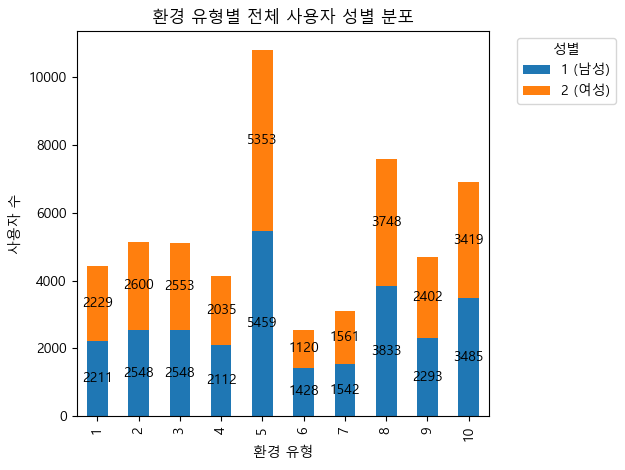

환경 유형별 전체 사용자 성별 분포 (수치):
gender        1.0   2.0
environment            
1            2211  2229
2            2548  2600
3            2548  2553
4            2112  2035
5            5459  5353
6            1428  1120
7            1542  1561
8            3833  3748
9            2293  2402
10           3485  3419
환경 유형별 1(남성) 비율 (%):
environment
1     49.797297
2     49.494949
3     49.950990
4     50.928382
5     50.490196
6     56.043956
7     49.693845
8     50.560612
9     48.839191
10    50.477984
dtype: float64
환경 유형별 2(여성) 비율 (%):
environment
1     50.202703
2     50.505051
3     50.049010
4     49.071618
5     49.509804
6     43.956044
7     50.306155
8     49.439388
9     51.160809
10    49.522016
dtype: float64
전체 성별 비율 (%):
gender
1.0    50.402908
2.0    49.597092
Name: proportion, dtype: float64


In [2]:
# 모든 사용자 성별 컬럼 찾기
gender_columns = [col for col in data.columns if 'user_' in col and 'gender' in col]

# 각 행의 모든 사용자 데이터를 하나의 행으로 변환
all_genders = []
all_environments = []

for idx, row in data.iterrows():
    environment = row['environment']
    # 각 사용자의 성별 추출
    for gender_col in gender_columns:
        if pd.notna(row[gender_col]):  # NaN이 아닌 경우만 포함
            all_genders.append(row[gender_col])
            all_environments.append(environment)

# 새로운 데이터프레임 생성
combined_df = pd.DataFrame({
    'environment': all_environments,
    'gender': all_genders
})

# 환경 유형별 성별 분포 계산
gender_env_dist = pd.crosstab(combined_df['environment'], combined_df['gender'])

# 시각화
plt.figure(figsize=(12, 6))
ax = gender_env_dist.plot(kind='bar', stacked=True)
plt.title('환경 유형별 전체 사용자 성별 분포')
plt.xlabel('환경 유형')
plt.ylabel('사용자 수')
plt.legend(title='성별', labels=['1 (남성)', '2 (여성)'], bbox_to_anchor=(1.05, 1), loc='upper left')

# 각 막대에 숫자 표시
for c in ax.containers:
    ax.bar_label(c, label_type='center')

plt.tight_layout()
plt.show()

# 분포 출력
print("\
환경 유형별 전체 사용자 성별 분포 (수치):")
print(gender_env_dist)

# 각 환경별 성비 계산 (1(남성) 비율)
gender_ratio1 = (gender_env_dist[1] / (gender_env_dist[1] + gender_env_dist[2]) * 100)
print("\
환경 유형별 1(남성) 비율 (%):")
print(gender_ratio1)

# 각 환경별 성비 계산 (2(여성) 비율)
gender_ratio2 = (gender_env_dist[2] / (gender_env_dist[1] + gender_env_dist[2]) * 100)
print("\
환경 유형별 2(여성) 비율 (%):")
print(gender_ratio2)

# 전체 성별 비율 계산
total_gender_dist = combined_df['gender'].value_counts(normalize=True) * 100
print("\
전체 성별 비율 (%):")
print(total_gender_dist.sort_index())

### 연령대 상관 관계 (1: 유소년, 2: 청중장년, 3: 노년)

<Figure size 1200x600 with 0 Axes>

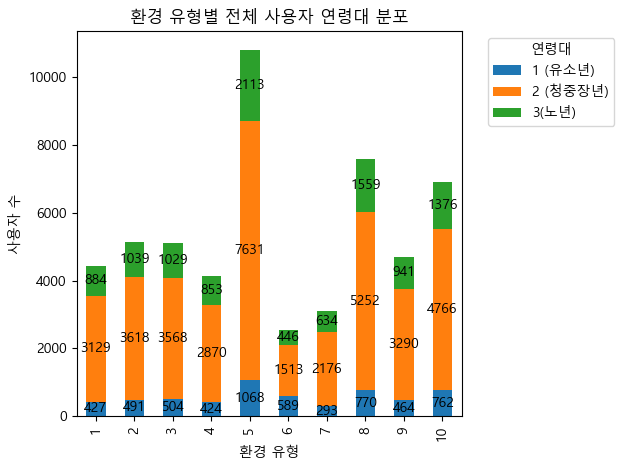

환경 유형별 전체 사용자 연령대 분포 (수치):
age           1.0   2.0   3.0
environment                  
1             427  3129   884
2             491  3618  1039
3             504  3568  1029
4             424  2870   853
5            1068  7631  2113
6             589  1513   446
7             293  2176   634
8             770  5252  1559
9             464  3290   941
10            762  4766  1376
환경 유형별 1(유소년) 비율 (%):
environment
1      9.617117
2      9.537685
3      9.880416
4     10.224259
5      9.877913
6     23.116170
7      9.442475
8     10.156971
9      9.882854
10    11.037080
dtype: float64
환경 유형별 2(청중장년) 비율 (%):
environment
1     70.472973
2     70.279720
3     69.947069
4     69.206655
5     70.578986
6     59.379906
7     70.125685
8     69.278459
9     70.074547
10    69.032445
dtype: float64
환경 유형별 3(노년) 비율 (%):
environment
1     19.909910
2     20.182595
3     20.172515
4     20.569086
5     19.543100
6     17.503925
7     20.431840
8     20.564569
9     20.042599
10    19.930475
d

In [3]:
# 모든 사용자 연령대 컬럼 찾기
age_columns = [col for col in data.columns if 'user_' in col and 'age' in col]

# 각 행의 모든 사용자 데이터를 하나의 행으로 변환
all_age = []
all_environments = []

for idx, row in data.iterrows():
    environment = row['environment']
    # 각 사용자의 연령대 추출
    for age_col in age_columns:
        if pd.notna(row[age_col]):  # NaN이 아닌 경우만 포함
            all_age.append(row[age_col])
            all_environments.append(environment)

# 새로운 데이터프레임 생성
combined_df = pd.DataFrame({
    'environment': all_environments,
    'age': all_age
})

# 환경 유형별 연령대 분포 계산
age_env_dist = pd.crosstab(combined_df['environment'], combined_df['age'])

# 시각화
plt.figure(figsize=(12, 6))
ax = age_env_dist.plot(kind='bar', stacked=True)
plt.title('환경 유형별 전체 사용자 연령대 분포')
plt.xlabel('환경 유형')
plt.ylabel('사용자 수')
plt.legend(title='연령대', labels=['1 (유소년)', '2 (청중장년)', '3(노년)'], bbox_to_anchor=(1.05, 1), loc='upper left')

# 각 막대에 숫자 표시
for c in ax.containers:
    ax.bar_label(c, label_type='center')

plt.tight_layout()
plt.show()

# 분포 출력
print("\
환경 유형별 전체 사용자 연령대 분포 (수치):")
print(age_env_dist)

# 각 환경별 연령대비 계산 (1(유소년) 비율)
age1_ratio = (age_env_dist[1] / (age_env_dist[1] + age_env_dist[2] + age_env_dist[3]) * 100)
print("\
환경 유형별 1(유소년) 비율 (%):")
print(age1_ratio)

# 각 환경별 연령대비 계산 (2(청중장년) 비율)
age2_ratio = (age_env_dist[2] / (age_env_dist[1] + age_env_dist[2] + age_env_dist[3]) * 100)
print("\
환경 유형별 2(청중장년) 비율 (%):")
print(age2_ratio)

# 각 환경별 연령대비 계산 (3(노년) 비율)
age3_ratio = (age_env_dist[3] / (age_env_dist[1] + age_env_dist[2] + age_env_dist[3]) * 100)
print("\
환경 유형별 3(노년) 비율 (%):")
print(age3_ratio)

# 전체 연령대 비율 계산
total_age_dist = combined_df['age'].value_counts(normalize=True) * 100
print("\
전체 연령대 비율 (%):")
print(total_age_dist.sort_index())

### 장애 유무 상관 관계 (1: 유, 2: 무)

<Figure size 1200x600 with 0 Axes>

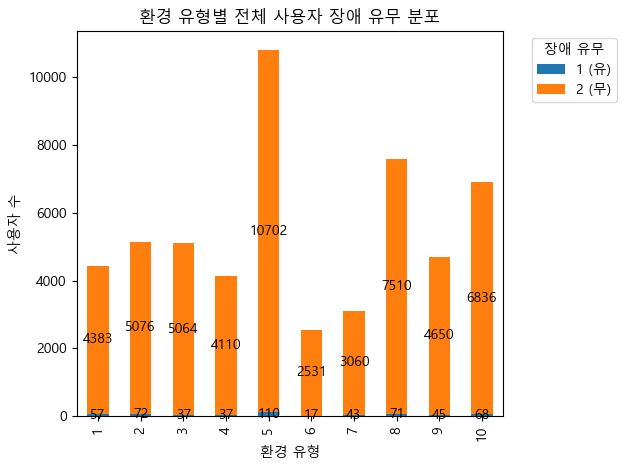

환경 유형별 전체 사용자 장애 유무 분포 (수치):
disability   1.0    2.0
environment            
1             57   4383
2             72   5076
3             37   5064
4             37   4110
5            110  10702
6             17   2531
7             43   3060
8             71   7510
9             45   4650
10            68   6836
환경 유형별 1(유) 비율 (%):
environment
1     1.283784
2     1.398601
3     0.725348
4     0.892211
5     1.017388
6     0.667190
7     1.385756
8     0.936552
9     0.958466
10    0.984936
dtype: float64
환경 유형별 2(무) 비율 (%):
environment
1     98.716216
2     98.601399
3     99.274652
4     99.107789
5     98.982612
6     99.332810
7     98.614244
8     99.063448
9     99.041534
10    99.015064
dtype: float64
전체 장애 유무 비율 (%):
disability
1.0     1.022412
2.0    98.977588
Name: proportion, dtype: float64


In [4]:
# 모든 사용자 장애 유무 컬럼 찾기
disability_columns = [col for col in data.columns if 'user_' in col and 'disability' in col]

# 각 행의 모든 사용자 데이터를 하나의 행으로 변환
all_disability = []
all_environments = []

for idx, row in data.iterrows():
    environment = row['environment']
    # 각 사용자의 연령대 추출
    for disability_col in disability_columns:
        if pd.notna(row[disability_col]):  # NaN이 아닌 경우만 포함
            all_disability.append(row[disability_col])
            all_environments.append(environment)

# 새로운 데이터프레임 생성
combined_df = pd.DataFrame({
    'environment': all_environments,
    'disability': all_disability
})

# 환경 유형별 장애 유무 분포 계산
disability_env_dist = pd.crosstab(combined_df['environment'], combined_df['disability'])

# 시각화
plt.figure(figsize=(12, 6))
ax = disability_env_dist.plot(kind='bar', stacked=True)
plt.title('환경 유형별 전체 사용자 장애 유무 분포')
plt.xlabel('환경 유형')
plt.ylabel('사용자 수')
plt.legend(title='장애 유무', labels=['1 (유)', '2 (무)'], bbox_to_anchor=(1.05, 1), loc='upper left')

# 각 막대에 숫자 표시
for c in ax.containers:
    ax.bar_label(c, label_type='center')

plt.tight_layout()
plt.show()

# 분포 출력
print("\
환경 유형별 전체 사용자 장애 유무 분포 (수치):")
print(disability_env_dist)

# 각 환경별 연령대비 계산 (1(유) 비율)
disability1_ratio = (disability_env_dist[1] / (disability_env_dist[1] + disability_env_dist[2]) * 100)
print("\
환경 유형별 1(유) 비율 (%):")
print(disability1_ratio)

# 각 환경별 연령대비 계산 (2(무) 비율)
disability2_ratio = (disability_env_dist[2] / (disability_env_dist[1] + disability_env_dist[2]) * 100)
print("\
환경 유형별 2(무) 비율 (%):")
print(disability2_ratio)

# 전체 장애 유무 비율 계산
total_disability_dist = combined_df['disability'].value_counts(normalize=True) * 100
print("\
전체 장애 유무 비율 (%):")
print(total_disability_dist.sort_index())

### 행동 유형 별 주요 사용 시간(0: 기타, 1: 탐색, 2: 사용, 3: 종료)

<Figure size 1200x600 with 0 Axes>

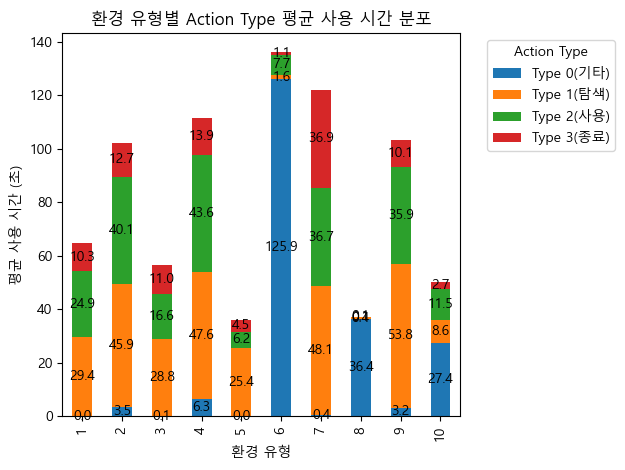


환경 유형별 Action Type 평균 사용 시간 (초):
             action_type_0_duration_seconds  action_type_1_duration_seconds  \
environment                                                                   
1                                  0.000000                       29.444456   
2                                  3.515263                       45.908765   
3                                  0.115945                       28.760070   
4                                  6.297919                       47.579017   
5                                  0.000000                       25.404920   
6                                125.855565                        1.590125   
7                                  0.358863                       48.111248   
8                                 36.448956                        0.449255   
9                                  3.245204                       53.806710   
10                                27.433379                        8.588423   

             acti

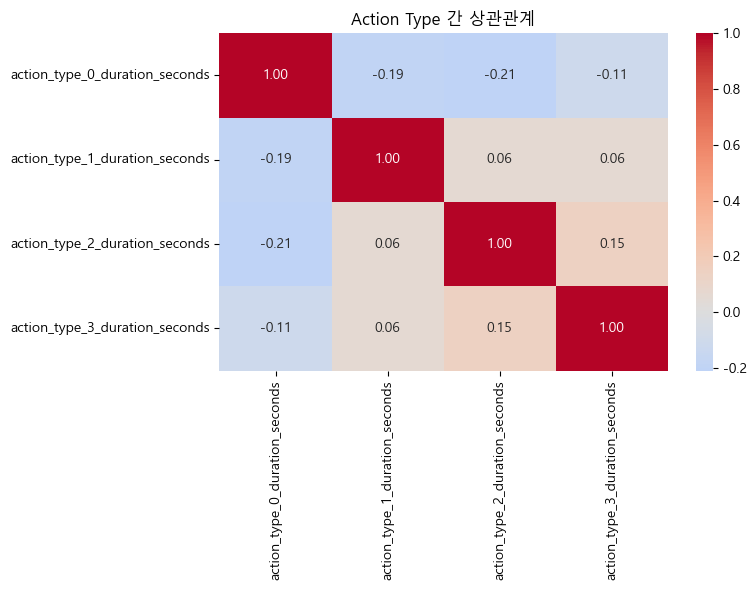

In [5]:
# action type duration 컬럼 찾기
action_columns = [col for col in data.columns if 'action_type_' in col and 'duration' in col]

# 프레임을 초 단위로 변환 (15fps 기준)
for col in action_columns:
    data[f'{col}_seconds'] = data[col] / 15

# 초 단위로 변환된 컬럼 찾기
action_seconds_columns = [col for col in data.columns if 'action_type_' in col and 'seconds' in col]

# 환경 유형별 각 action type의 평균 시간 계산 (초 단위)
action_means = data.groupby('environment')[action_seconds_columns].mean()

# 시각화 1: 누적 막대 그래프
plt.figure(figsize=(12, 6))
ax = action_means.plot(kind='bar', stacked=True)
plt.title('환경 유형별 Action Type 평균 사용 시간 분포')
plt.xlabel('환경 유형')
plt.ylabel('평균 사용 시간 (초)')
plt.legend(title='Action Type', 
          labels=['Type 0(기타)', 'Type 1(탐색)', 'Type 2(사용)', 'Type 3(종료)'], 
          bbox_to_anchor=(1.05, 1), 
          loc='upper left')

# 각 막대에 숫자 표시
for c in ax.containers:
    ax.bar_label(c, label_type='center', fmt='%.1f')

plt.tight_layout()
plt.show()

# 분포 출력
print("\n환경 유형별 Action Type 평균 사용 시간 (초):")
print(action_means)

# 각 환경별 action type 비율 계산
total_duration = action_means.sum(axis=1)

for i, action_col in enumerate(action_seconds_columns):
    action_ratio = (action_means[action_col] / total_duration * 100)
    print(f"\n환경 유형별 {action_col} 비율 (%):")
    print(action_ratio)

# 전체 action type 사용 비율 계산
total_action_ratio = data[action_seconds_columns].sum() / data[action_seconds_columns].sum().sum() * 100
print("\n전체 Action Type 사용 비율 (%):")
print(total_action_ratio)

# 시각화 2: 상관관계 히트맵
correlation = data[action_seconds_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Action Type 간 상관관계')
plt.tight_layout()
plt.show()

### 사용자 수와 환경의 상관관계

<Figure size 1200x600 with 0 Axes>

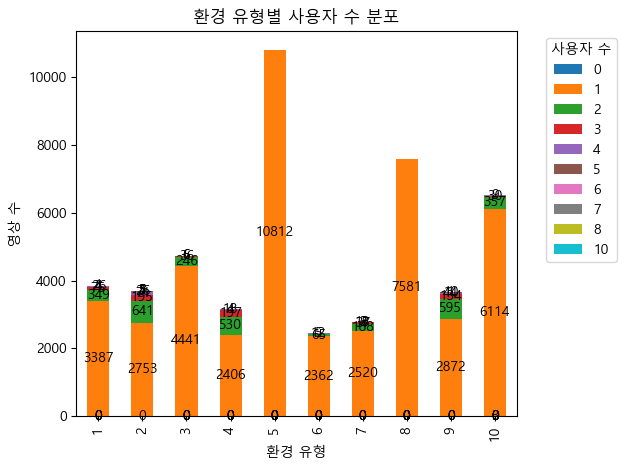


환경 유형별 사용자 수 분포 (영상 개수):
user_num     0      1    2    3   4   5   6   7   8   10
environment                                             
1             0   3387  349   75  26   4   1   0   0   0
2             0   2753  641  195  71  26   7   5   5   1
3             0   4441  246   36   6   6   0   0   0   0
4             0   2406  530  197  18   4   0   0   0   0
5             0  10812    0    0   0   0   0   0   0   0
6             0   2362   65   12   5   0   0   0   0   0
7             0   2520  188   37  18   3   2   0   0   0
8             0   7581    0    0   0   0   0   0   0   0
9             0   2872  595  134  44  10   1   0   0   0
10            3   6114  357   30   9   0   0   0   0   0

환경 유형별 사용자 0명인 경우의 비율 (%):
environment
1     0.000000
2     0.000000
3     0.000000
4     0.000000
5     0.000000
6     0.000000
7     0.000000
8     0.000000
9     0.000000
10    0.046062
dtype: float64

환경 유형별 사용자 1명인 경우의 비율 (%):
environment
1      88.157210
2      74.325054
3      93.7

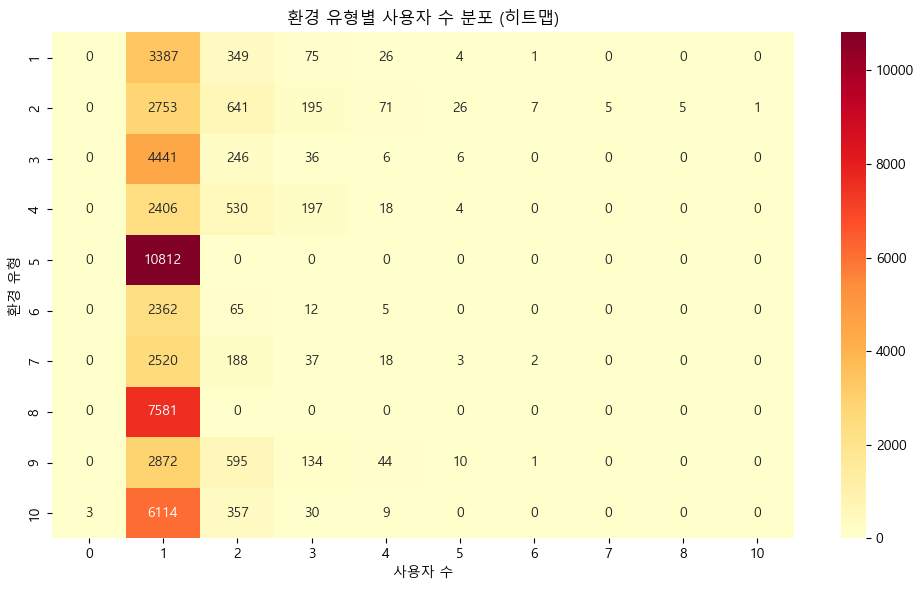


환경 유형별 평균 사용자 수:
environment
1     1.155648
2     1.393359
3     1.076030
4     1.315055
5     1.000000
6     1.042553
7     1.122110
8     1.000000
9     1.284464
10    1.067711
Name: user_num, dtype: float64

환경 유형별 사용자 수 중앙값:
environment
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
Name: user_num, dtype: float64

환경 유형별 사용자 수 표준편차:
environment
1     0.478358
2     0.835332
3     0.329069
4     0.624696
5     0.000000
6     0.250725
7     0.447749
8     0.000000
9     0.622461
10    0.285593
Name: user_num, dtype: float64


In [6]:
# 환경별 사용자 수 분포 계산
user_env_dist = pd.crosstab(data['environment'], data['user_num'])

# 시각화 1: 막대 그래프
plt.figure(figsize=(12, 6))
ax = user_env_dist.plot(kind='bar', stacked=True)
plt.title('환경 유형별 사용자 수 분포')
plt.xlabel('환경 유형')
plt.ylabel('영상 수')
plt.legend(title='사용자 수', bbox_to_anchor=(1.05, 1), loc='upper left')

# 각 막대에 숫자 표시
for c in ax.containers:
    ax.bar_label(c, label_type='center')

plt.tight_layout()
plt.show()

# 분포 출력
print("\n환경 유형별 사용자 수 분포 (영상 개수):")
print(user_env_dist)

# 각 환경별 사용자 수 비율 계산
unique_user_nums = sorted(data['user_num'].unique())  # 실제 존재하는 사용자 수만 가져오기
for i in unique_user_nums:
    user_ratio = (user_env_dist[i] / user_env_dist.sum(axis=1) * 100)
    print(f"\n환경 유형별 사용자 {i}명인 경우의 비율 (%):")
    print(user_ratio)

# 전체 사용자 수 분포 비율
total_user_ratio = data['user_num'].value_counts(normalize=True) * 100
print("\n전체 사용자 수 분포 비율 (%):")
print(total_user_ratio.sort_index())

# 시각화 2: 히트맵
plt.figure(figsize=(10, 6))
sns.heatmap(user_env_dist, annot=True, fmt='d', cmap='YlOrRd')
plt.title('환경 유형별 사용자 수 분포 (히트맵)')
plt.xlabel('사용자 수')
plt.ylabel('환경 유형')
plt.tight_layout()
plt.show()

# 기초 통계량 계산
print("\n환경 유형별 평균 사용자 수:")
print(data.groupby('environment')['user_num'].mean())

print("\n환경 유형별 사용자 수 중앙값:")
print(data.groupby('environment')['user_num'].median())

print("\n환경 유형별 사용자 수 표준편차:")
print(data.groupby('environment')['user_num'].std())

## 2. 사용자 특성 분석

### 연령대별 탐색, 사용, 완료에 소요한 평균 시간

<Figure size 1200x600 with 0 Axes>

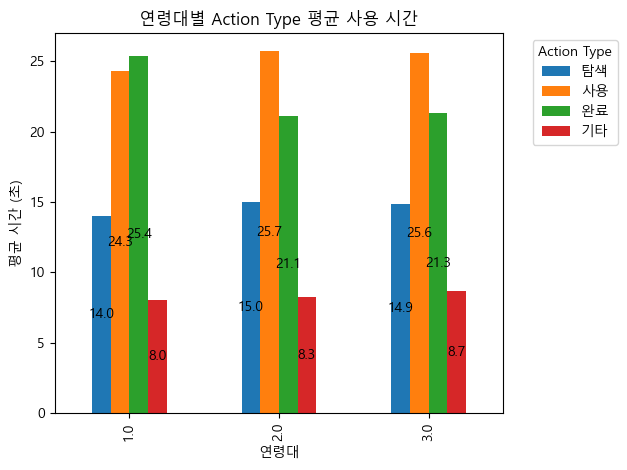


연령대별 Action Type 평균 시간 (초):
      action_0   action_1   action_2  action_3
age                                           
1.0  13.968393  24.303994  25.361648  8.032366
2.0  15.023577  25.688589  21.111605  8.251332
3.0  14.854865  25.558126  21.322537  8.666477

연령대별 Action Type 비율 (%):
      action_0   action_1   action_2   action_3
age                                            
1.0  19.490853  33.912675  35.388477  11.207995
2.0  21.439251  36.658653  30.127113  11.774983
3.0  21.100059  36.303123  30.286832  12.309986


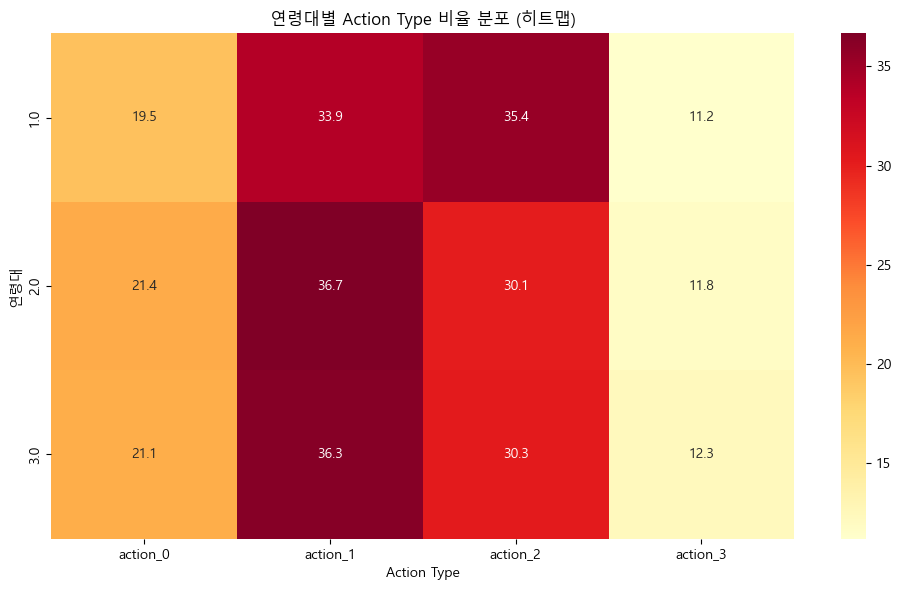

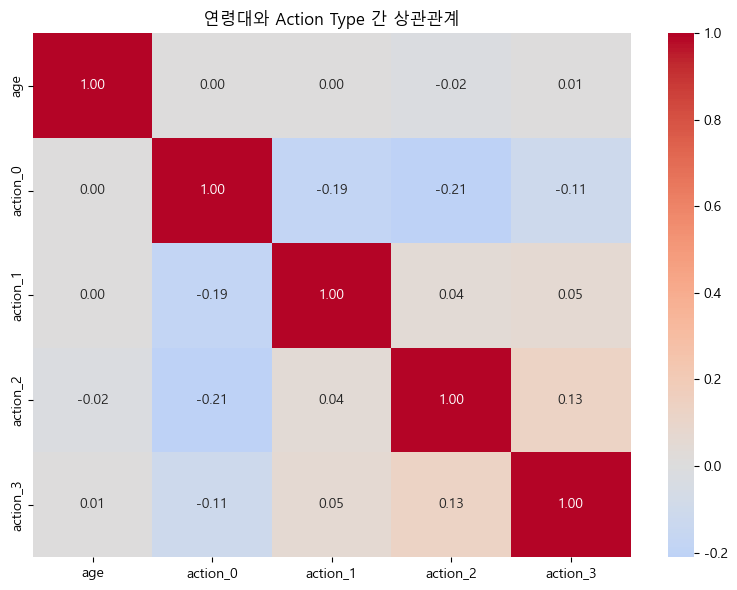


연령대별 전체 평균 사용 시간 (초):
age
1.0    71.666402
2.0    70.075103
3.0    70.402005
dtype: float64

연령대별 Action Type 최대 시간 (초):
        action_0     action_1     action_2     action_3
age                                                    
1.0   321.400000   628.000000  1635.733333   435.000000
2.0  1431.800000  1308.133333  1187.933333  1002.333333
3.0  1183.533333   889.533333   472.800000  1128.266667

연령대별 Action Type 표준편차 (초):
      action_0   action_1   action_2   action_3
age                                            
1.0  35.808708  48.609673  55.472593  25.756129
2.0  40.064618  51.984839  36.287477  28.436980
3.0  38.925750  52.213373  34.849536  32.632012


In [7]:
# 모든 사용자 연령대 컬럼 찾기
age_columns = [col for col in data.columns if 'user_' in col and 'age' in col]

# 각 행의 모든 사용자 연령대와 action duration 데이터 수집
all_data = []

for idx, row in data.iterrows():
    # 각 사용자의 연령대와 action duration 추출
    for age_col in age_columns:
        if pd.notna(row[age_col]):  # NaN이 아닌 경우만 포함
            user_data = {
                'age': row[age_col],
                'action_0': row['action_type_0_duration'] / 15,  # 초 단위 변환
                'action_1': row['action_type_1_duration'] / 15,
                'action_2': row['action_type_2_duration'] / 15,
                'action_3': row['action_type_3_duration'] / 15
            }
            all_data.append(user_data)

# 데이터프레임 생성
df_analysis = pd.DataFrame(all_data)

# 연령대별 평균 시간 계산
age_means = df_analysis.groupby('age')[['action_0', 'action_1', 'action_2', 'action_3']].mean()

# 시각화 1: 막대 그래프
plt.figure(figsize=(12, 6))
ax = age_means.plot(kind='bar')
plt.title('연령대별 Action Type 평균 사용 시간')
plt.xlabel('연령대')
plt.ylabel('평균 시간 (초)')
plt.legend(title='Action Type', 
          labels=['탐색', '사용', '완료', '기타'], 
          bbox_to_anchor=(1.05, 1), 
          loc='upper left')

# 각 막대에 숫자 표시
for c in ax.containers:
    ax.bar_label(c, label_type='center', fmt='%.1f')

plt.tight_layout()
plt.show()

# 평균 시간 출력
print("\n연령대별 Action Type 평균 시간 (초):")
print(age_means)

# 각 연령대별 action type 비율 계산
age_ratio = age_means.div(age_means.sum(axis=1), axis=0) * 100
print("\n연령대별 Action Type 비율 (%):")
print(age_ratio)

# 시각화 2: 히트맵
plt.figure(figsize=(10, 6))
sns.heatmap(age_ratio, annot=True, fmt='.1f', cmap='YlOrRd')
plt.title('연령대별 Action Type 비율 분포 (히트맵)')
plt.xlabel('Action Type')
plt.ylabel('연령대')
plt.tight_layout()
plt.show()

# 상관관계 분석
correlation = df_analysis.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('연령대와 Action Type 간 상관관계')
plt.tight_layout()
plt.show()

# 기초 통계량
print("\n연령대별 전체 평균 사용 시간 (초):")
print(age_means.sum(axis=1))

print("\n연령대별 Action Type 최대 시간 (초):")
print(df_analysis.groupby('age')[['action_0', 'action_1', 'action_2', 'action_3']].max())

print("\n연령대별 Action Type 표준편차 (초):")
print(df_analysis.groupby('age')[['action_0', 'action_1', 'action_2', 'action_3']].std())

### 성별 탐색, 사용, 완료에 소요한 평균 시간

<Figure size 1200x600 with 0 Axes>

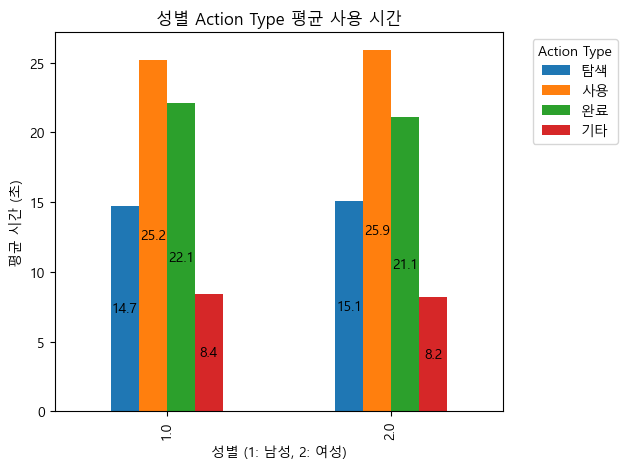


성별 Action Type 평균 시간 (초):
        gender_action_0  gender_action_1  gender_action_2  gender_action_3
gender                                                                    
1.0           14.688753        25.158884        22.126106         8.407861
2.0           15.069756        25.877594        21.076548         8.212393

성별 Action Type 비율 (%):
        gender_action_0  gender_action_1  gender_action_2  gender_action_3
gender                                                                    
1.0           20.870159        35.746392        31.437342        11.946107
2.0           21.455796        36.843623        30.008060        11.692521


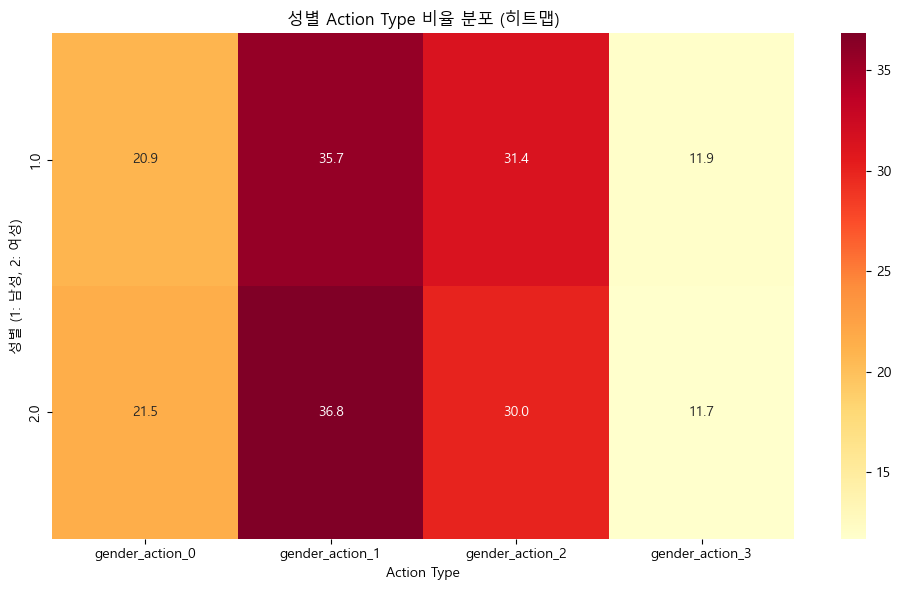

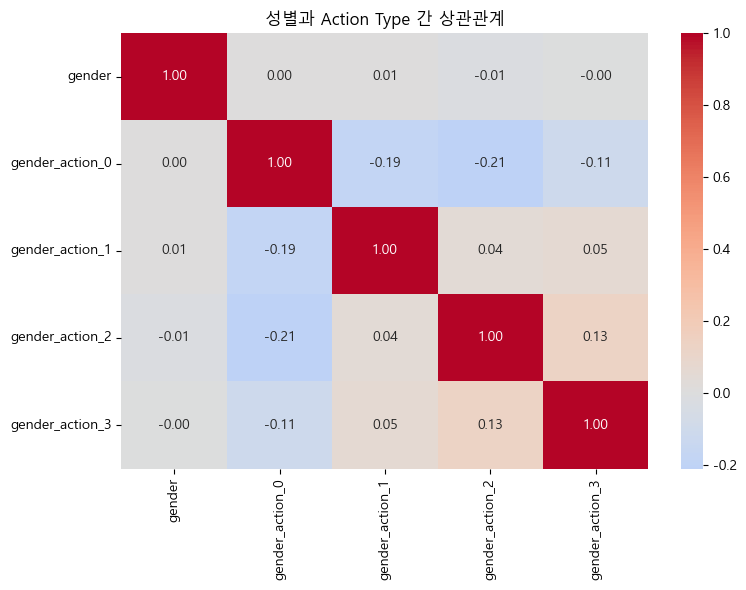


성별 전체 평균 사용 시간 (초):
gender
1.0    70.381604
2.0    70.236292
dtype: float64

성별 Action Type 최대 시간 (초):
        gender_action_0  gender_action_1  gender_action_2  gender_action_3
gender                                                                    
1.0         1431.800000       998.133333      1635.733333      1128.266667
2.0         1289.266667      1308.133333       626.133333      1045.866667

성별 Action Type 표준편차 (초):
        gender_action_0  gender_action_1  gender_action_2  gender_action_3
gender                                                                    
1.0           38.639077        50.904446        41.510746        29.652616
2.0           40.172819        52.461414        35.252818        28.440779


In [8]:
# 모든 사용자 성별 컬럼 찾기
gender_columns = [col for col in data.columns if 'user_' in col and 'gender' in col]

# 각 행의 모든 사용자 성별과 action duration 데이터 수집
gender_data = []

for idx, row in data.iterrows():
    # 각 사용자의 성별과 action duration 추출
    for gender_col in gender_columns:
        if pd.notna(row[gender_col]):  # NaN이 아닌 경우만 포함
            user_data = {
                'gender': row[gender_col],
                'gender_action_0': row['action_type_0_duration'] / 15,  # 초 단위 변환
                'gender_action_1': row['action_type_1_duration'] / 15,
                'gender_action_2': row['action_type_2_duration'] / 15,
                'gender_action_3': row['action_type_3_duration'] / 15
            }
            gender_data.append(user_data)

# 데이터프레임 생성
df_gender_analysis = pd.DataFrame(gender_data)

# 성별 평균 시간 계산
gender_means = df_gender_analysis.groupby('gender')[['gender_action_0', 'gender_action_1', 'gender_action_2', 'gender_action_3']].mean()

# 시각화 1: 막대 그래프
plt.figure(figsize=(12, 6))
ax = gender_means.plot(kind='bar')
plt.title('성별 Action Type 평균 사용 시간')
plt.xlabel('성별 (1: 남성, 2: 여성)')
plt.ylabel('평균 시간 (초)')
plt.legend(title='Action Type', 
          labels=['탐색', '사용', '완료', '기타'], 
          bbox_to_anchor=(1.05, 1), 
          loc='upper left')

# 각 막대에 숫자 표시
for c in ax.containers:
    ax.bar_label(c, label_type='center', fmt='%.1f')

plt.tight_layout()
plt.show()

# 평균 시간 출력
print("\n성별 Action Type 평균 시간 (초):")
print(gender_means)

# 각 성별 action type 비율 계산
gender_ratio = gender_means.div(gender_means.sum(axis=1), axis=0) * 100
print("\n성별 Action Type 비율 (%):")
print(gender_ratio)

# 시각화 2: 히트맵
plt.figure(figsize=(10, 6))
sns.heatmap(gender_ratio, annot=True, fmt='.1f', cmap='YlOrRd')
plt.title('성별 Action Type 비율 분포 (히트맵)')
plt.xlabel('Action Type')
plt.ylabel('성별 (1: 남성, 2: 여성)')
plt.tight_layout()
plt.show()

# 상관관계 분석
correlation = df_gender_analysis.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('성별과 Action Type 간 상관관계')
plt.tight_layout()
plt.show()

# 기초 통계량
print("\n성별 전체 평균 사용 시간 (초):")
print(gender_means.sum(axis=1))

print("\n성별 Action Type 최대 시간 (초):")
print(df_gender_analysis.groupby('gender')[['gender_action_0', 'gender_action_1', 'gender_action_2', 'gender_action_3']].max())

print("\n성별 Action Type 표준편차 (초):")
print(df_gender_analysis.groupby('gender')[['gender_action_0', 'gender_action_1', 'gender_action_2', 'gender_action_3']].std())

### 장애 여부별 탐색, 사용, 완료에 소요한 평균 시간

<Figure size 1200x600 with 0 Axes>

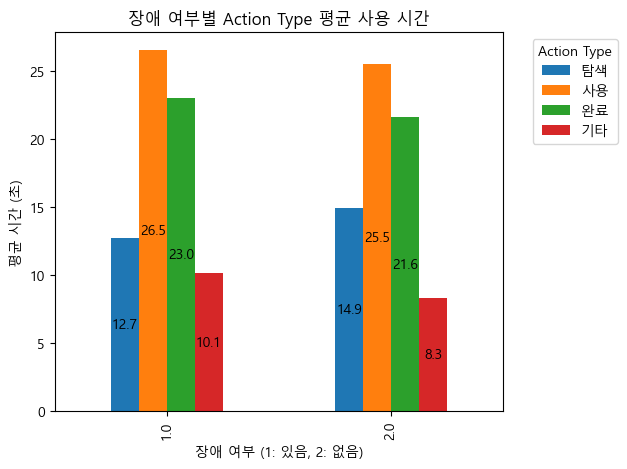


장애 여부별 Action Type 평균 시간 (초):
            dis_action_0  dis_action_1  dis_action_2  dis_action_3
disability                                                        
1.0            12.745661     26.497666     22.996768     10.138959
2.0            14.899743     25.505196     21.591185      8.292032

장애 여부별 Action Type 비율 (%):
            dis_action_0  dis_action_1  dis_action_2  dis_action_3
disability                                                        
1.0            17.609599     36.609578     31.772684     14.008139
2.0            21.198085     36.286621     30.718098     11.797196


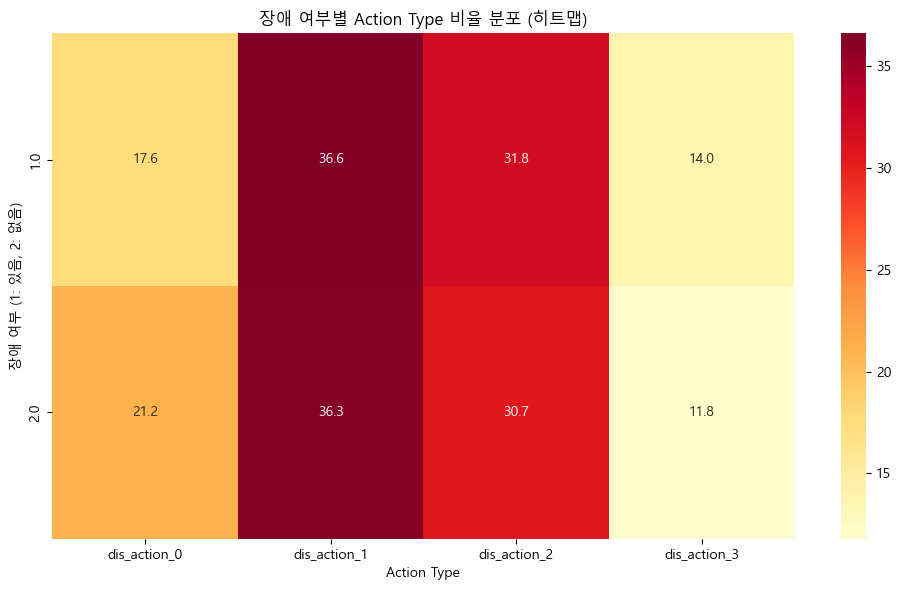

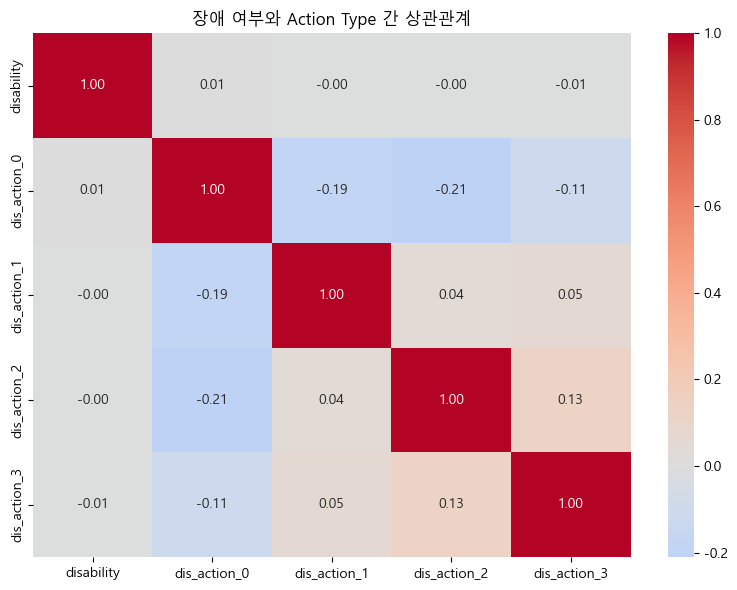


장애 여부별 전체 평균 사용 시간 (초):
disability
1.0    72.379054
2.0    70.288156
dtype: float64

장애 여부별 Action Type 최대 시간 (초):
            dis_action_0  dis_action_1  dis_action_2  dis_action_3
disability                                                        
1.0           193.266667    400.400000    389.533333    655.733333
2.0          1431.800000   1308.133333   1635.733333   1128.266667

장애 여부별 Action Type 표준편차 (초):
            dis_action_0  dis_action_1  dis_action_2  dis_action_3
disability                                                        
1.0            33.871176     47.043343     37.391213     39.010203
2.0            39.460133     51.729353     38.549190     28.937016


In [9]:
# 모든 사용자 장애 여부 컬럼 찾기
disability_columns = [col for col in data.columns if 'user_' in col and 'disability' in col]

# 각 행의 모든 사용자 장애 여부와 action duration 데이터 수집
disability_data = []

for idx, row in data.iterrows():
    # 각 사용자의 장애 여부와 action duration 추출
    for disability_col in disability_columns:
        if pd.notna(row[disability_col]):  # NaN이 아닌 경우만 포함
            user_data = {
                'disability': row[disability_col],
                'dis_action_0': row['action_type_0_duration'] / 15,  # 초 단위 변환
                'dis_action_1': row['action_type_1_duration'] / 15,
                'dis_action_2': row['action_type_2_duration'] / 15,
                'dis_action_3': row['action_type_3_duration'] / 15
            }
            disability_data.append(user_data)

# 데이터프레임 생성
df_disability_analysis = pd.DataFrame(disability_data)

# 장애 여부별 평균 시간 계산
disability_means = df_disability_analysis.groupby('disability')[['dis_action_0', 'dis_action_1', 'dis_action_2', 'dis_action_3']].mean()

# 시각화 1: 막대 그래프
plt.figure(figsize=(12, 6))
ax = disability_means.plot(kind='bar')
plt.title('장애 여부별 Action Type 평균 사용 시간')
plt.xlabel('장애 여부 (1: 있음, 2: 없음)')
plt.ylabel('평균 시간 (초)')
plt.legend(title='Action Type', 
          labels=['탐색', '사용', '완료', '기타'], 
          bbox_to_anchor=(1.05, 1), 
          loc='upper left')

# 각 막대에 숫자 표시
for c in ax.containers:
    ax.bar_label(c, label_type='center', fmt='%.1f')

plt.tight_layout()
plt.show()

# 평균 시간 출력
print("\n장애 여부별 Action Type 평균 시간 (초):")
print(disability_means)

# 각 장애 여부별 action type 비율 계산
disability_ratio = disability_means.div(disability_means.sum(axis=1), axis=0) * 100
print("\n장애 여부별 Action Type 비율 (%):")
print(disability_ratio)

# 시각화 2: 히트맵
plt.figure(figsize=(10, 6))
sns.heatmap(disability_ratio, annot=True, fmt='.1f', cmap='YlOrRd')
plt.title('장애 여부별 Action Type 비율 분포 (히트맵)')
plt.xlabel('Action Type')
plt.ylabel('장애 여부 (1: 있음, 2: 없음)')
plt.tight_layout()
plt.show()

# 상관관계 분석
correlation = df_disability_analysis.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('장애 여부와 Action Type 간 상관관계')
plt.tight_layout()
plt.show()

# 기초 통계량
print("\n장애 여부별 전체 평균 사용 시간 (초):")
print(disability_means.sum(axis=1))

print("\n장애 여부별 Action Type 최대 시간 (초):")
print(df_disability_analysis.groupby('disability')[['dis_action_0', 'dis_action_1', 'dis_action_2', 'dis_action_3']].max())

print("\n장애 여부별 Action Type 표준편차 (초):")
print(df_disability_analysis.groupby('disability')[['dis_action_0', 'dis_action_1', 'dis_action_2', 'dis_action_3']].std())

## 3. 시간 기반 분석

### 시간대 별 비율(성별, 연령대, 장애유무, 인원수)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_127616\1083592590.py:85: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  users_per_period = data.groupby('time_period')['user_num'].mean()


<Figure size 1500x600 with 0 Axes>

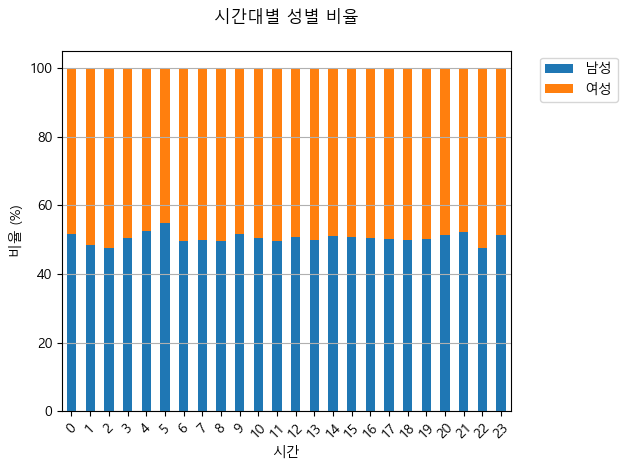


시간대별 성별 비율 (%):
gender             1.0        2.0
time_period                      
새벽(0-6시)     50.187266  49.812734
오전(6-12시)    50.374890  49.625110
오후(12-18시)   50.361034  49.638966
저녁(18-24시)   50.521643  49.478357


<Figure size 1500x600 with 0 Axes>

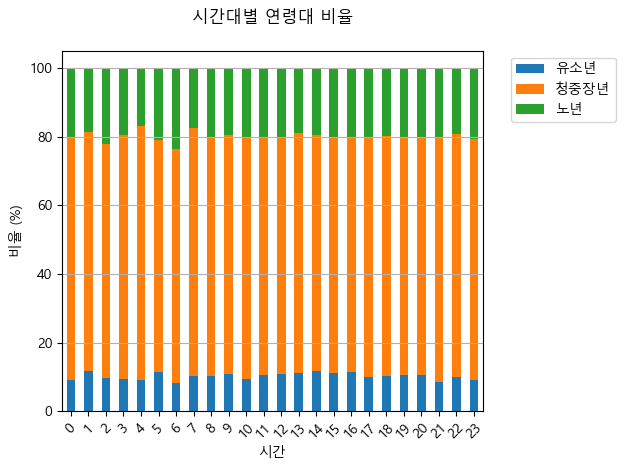


시간대별 연령대 비율 (%):
age                1.0        2.0        3.0
time_period                                 
새벽(0-6시)     10.112360  69.616105  20.271536
오전(6-12시)    10.522778  69.465846  20.011376
오후(12-18시)   11.023286  69.147618  19.829096
저녁(18-24시)   10.077691  69.833518  20.088790


<Figure size 1500x600 with 0 Axes>

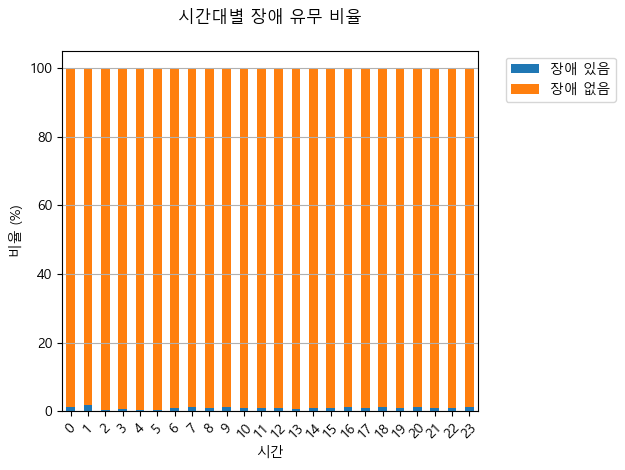


시간대별 장애 유무 비율 (%):
disability        1.0        2.0
time_period                     
새벽(0-6시)     0.842697  99.157303
오전(6-12시)    1.049692  98.950308
오후(12-18시)   0.991241  99.008759
저녁(18-24시)   1.065483  98.934517


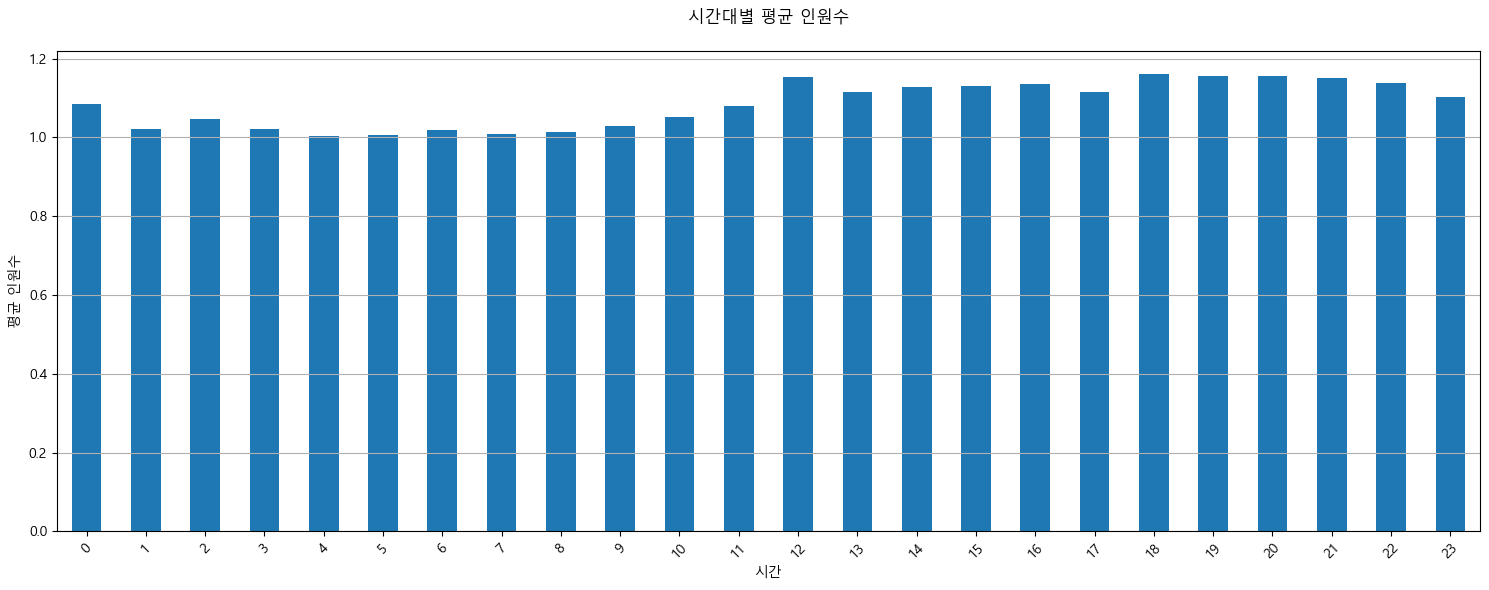


시간대별 평균 인원수:
time_period
새벽(0-6시)      1.021033
오전(6-12시)     1.078377
오후(12-18시)    1.129534
저녁(18-24시)    1.145468
Name: user_num, dtype: float64

전체 데이터 요약:
총 관측 수: 49207
시간대별 데이터 수:
time_period
오후(12-18시)    20759
오전(6-12시)     17939
저녁(18-24시)     7878
새벽(0-6시)       2092
Name: count, dtype: int64


In [10]:
def extract_hour(filename):
    try:
        # 파일명에서 시간 부분 추출
        time_str = filename.split('_')[1]  # 10121001.mp4 추출
        time_str = time_str.split('.')[0]  # 확장자 제거
        
        hour = int(time_str[4:6])  # 다섯 번째와 여섯 번째 문자 추출
        
        # 시간 값 검증
        if hour < 0 or hour > 23:
            print(f"Warning: Invalid hour ({hour}) in filename: {filename}")
            return None
            
        return hour
    except (IndexError, ValueError) as e:
        print(f"Error processing filename: {filename}")
        print(f"Error details: {str(e)}")
        return None

# 시간대 정보 추출
data['hour'] = data['file_name'].apply(extract_hour)

# 유효한 시간대만 필터링
data = data[data['hour'].notna()]
data['hour'] = data['hour'].astype(int)

data['time_period'] = pd.cut(data['hour'], 
                            bins=[0, 6, 12, 18, 24], 
                            labels=['새벽(0-6시)', '오전(6-12시)', '오후(12-18시)', '저녁(18-24시)'])

# 모든 사용자 컬럼 찾기
gender_columns = [col for col in data.columns if 'user_' in col and 'gender' in col]
age_columns = [col for col in data.columns if 'user_' in col and 'age' in col]
disability_columns = [col for col in data.columns if 'user_' in col and 'disability' in col]

# 각 특성별 데이터 수집
all_genders = []
all_ages = []
all_disabilities = []
all_hours = []
all_periods = []

for idx, row in data.iterrows():
    hour = row['hour']
    period = row['time_period']
    
    for g_col in gender_columns:
        if pd.notna(row[g_col]):
            all_genders.append(row[g_col])
            all_hours.append(hour)
            all_periods.append(period)
            
    for a_col in age_columns:
        if pd.notna(row[a_col]):
            all_ages.append(row[a_col])
            
    for d_col in disability_columns:
        if pd.notna(row[d_col]):
            all_disabilities.append(row[d_col])

# 시간대별 분석
# 1. 성별 비율
gender_time = pd.DataFrame({'hour': all_hours, 'gender': all_genders})
gender_time_ratio = pd.crosstab(gender_time['hour'], gender_time['gender'], normalize='index') * 100
gender_period_ratio = pd.crosstab(pd.Series(all_periods, name='time_period'), 
                                 pd.Series(all_genders, name='gender'), 
                                 normalize='index') * 100

# 2. 연령대 비율
age_time = pd.DataFrame({'hour': all_hours, 'age': all_ages})
age_time_ratio = pd.crosstab(age_time['hour'], age_time['age'], normalize='index') * 100
age_period_ratio = pd.crosstab(pd.Series(all_periods, name='time_period'), 
                              pd.Series(all_ages, name='age'), 
                              normalize='index') * 100

# 3. 장애 유무 비율
disability_time = pd.DataFrame({'hour': all_hours, 'disability': all_disabilities})
disability_time_ratio = pd.crosstab(disability_time['hour'], disability_time['disability'], normalize='index') * 100
disability_period_ratio = pd.crosstab(pd.Series(all_periods, name='time_period'), 
                                     pd.Series(all_disabilities, name='disability'), 
                                     normalize='index') * 100

# 4. 시간대별 평균 인원수
users_per_time = data.groupby('hour')['user_num'].mean()
users_per_period = data.groupby('time_period')['user_num'].mean()

# 시각화
# 1. 성별
plt.figure(figsize=(15, 6))
gender_time_ratio.plot(kind='bar', stacked=True)
plt.title('시간대별 성별 비율', pad=20)
plt.xlabel('시간')
plt.ylabel('비율 (%)')
plt.legend(['남성', '여성'], bbox_to_anchor=(1.05, 1))
plt.grid(True, axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\n시간대별 성별 비율 (%):")
print(gender_period_ratio)

# 2. 연령대
plt.figure(figsize=(15, 6))
age_time_ratio.plot(kind='bar', stacked=True)
plt.title('시간대별 연령대 비율', pad=20)
plt.xlabel('시간')
plt.ylabel('비율 (%)')
plt.legend(['유소년', '청중장년', '노년'], bbox_to_anchor=(1.05, 1))
plt.grid(True, axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\n시간대별 연령대 비율 (%):")
print(age_period_ratio)

# 3. 장애 유무
plt.figure(figsize=(15, 6))
disability_time_ratio.plot(kind='bar', stacked=True)
plt.title('시간대별 장애 유무 비율', pad=20)
plt.xlabel('시간')
plt.ylabel('비율 (%)')
plt.legend(['장애 있음', '장애 없음'], bbox_to_anchor=(1.05, 1))
plt.grid(True, axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\n시간대별 장애 유무 비율 (%):")
print(disability_period_ratio)

# 4. 평균 인원수
plt.figure(figsize=(15, 6))
users_per_time.plot(kind='bar')
plt.title('시간대별 평균 인원수', pad=20)
plt.xlabel('시간')
plt.ylabel('평균 인원수')
plt.grid(True, axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\n시간대별 평균 인원수:")
print(users_per_period)

# 추가적인 통계 정보
print("\n전체 데이터 요약:")
print(f"총 관측 수: {len(data)}")
print(f"시간대별 데이터 수:")
print(data['time_period'].value_counts())

### 전체 영상 프레임에서 각 동작이 차지하는 비율

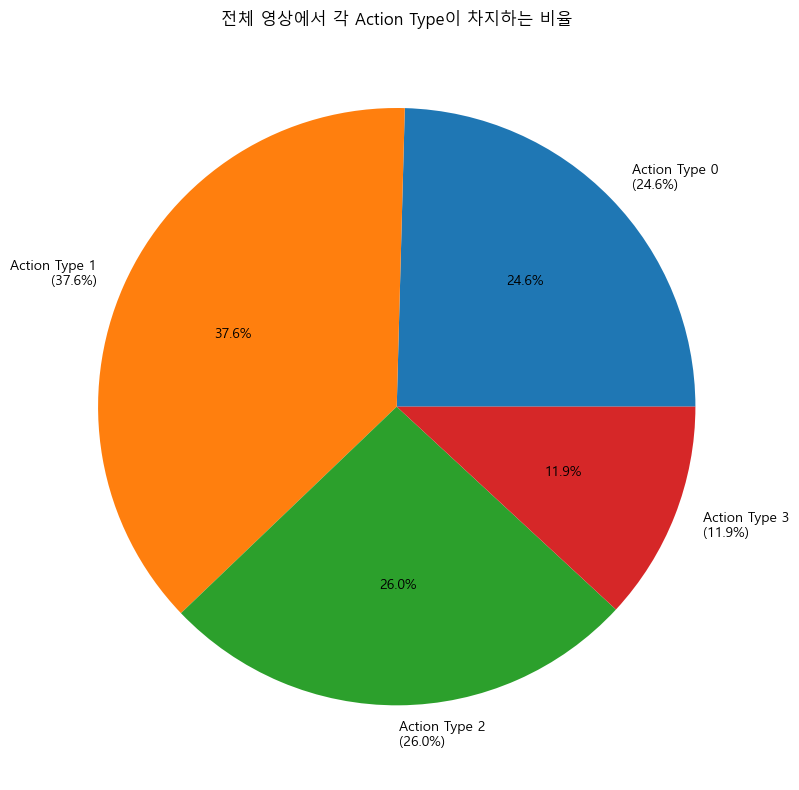

<Figure size 1500x600 with 0 Axes>

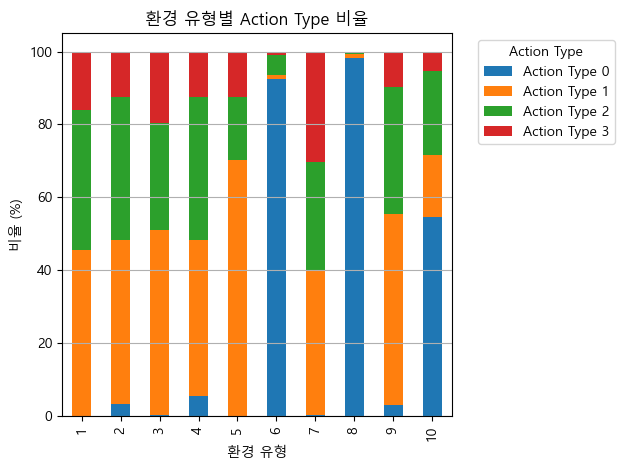


전체 Action Type 비율:
Action Type 0: 24.57%
Action Type 1: 37.58%
Action Type 2: 25.96%
Action Type 3: 11.88%

환경 유형별 Action Type 비율:
    Action Type 0  Action Type 1  Action Type 2  Action Type 3
1        0.000000      45.618681      38.460053      15.921266
2        3.438801      44.910185      39.230955      12.420060
3        0.205115      50.878607      29.388274      19.528004
4        5.655776      42.727811      39.135655      12.480758
5        0.000000      70.364487      17.227556      12.407958
6       92.362070       1.166951       5.636653       0.834326
7        0.294037      39.420266      30.084850      30.200847
8       98.121629       1.209407       0.265616       0.403349
9        3.149841      52.225554      34.832464       9.792141
10      54.621781      17.100152      22.972581       5.305485

각 Action Type의 기초 통계량:
       action_type_0_duration  action_type_1_duration  action_type_2_duration  \
count            49207.000000            49207.000000            49207

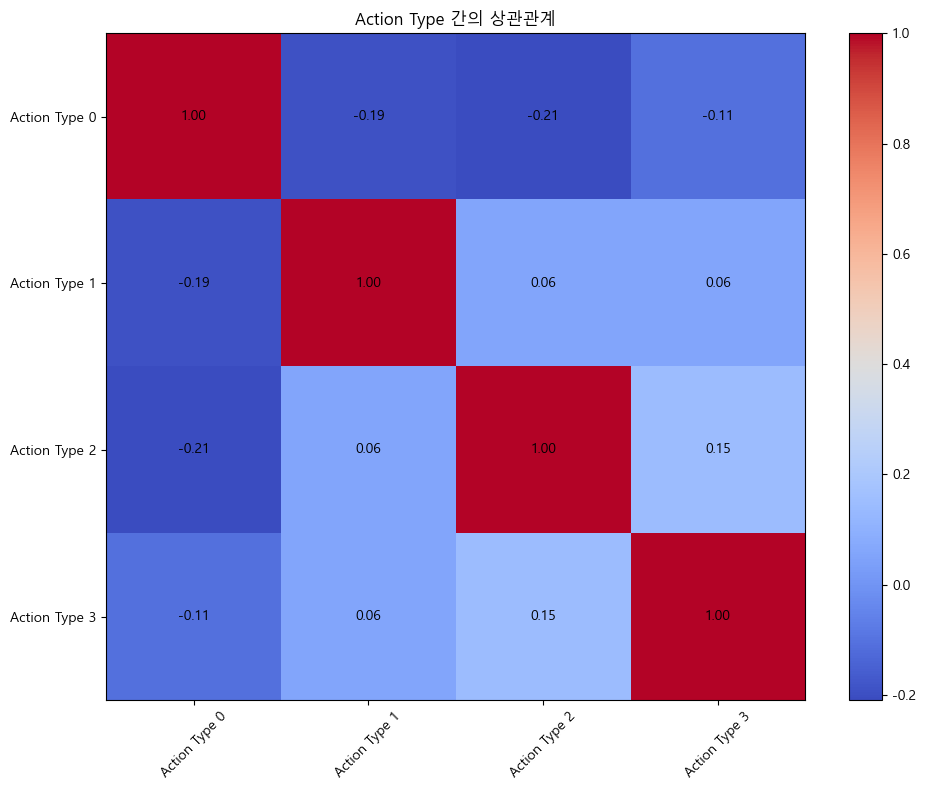

In [14]:
# Action Type 컬럼
action_columns = ['action_type_0_duration', 'action_type_1_duration', 
                 'action_type_2_duration', 'action_type_3_duration']

# 환경 유형별 비율 계산을 위한 함수
def calculate_ratios_by_env(df, env):
    env_data = df[df['environment'] == env]
    total_duration = env_data[action_columns].sum().sum()
    return env_data[action_columns].sum() / total_duration * 100

# 환경 유형별 비율 계산
env_ratios = {}
for env in range(1, 11):  # 1부터 10까지의 환경 유형
    ratios = calculate_ratios_by_env(data, env)
    env_ratios[env] = ratios

# DataFrame 생성
env_ratios_df = pd.DataFrame(env_ratios).T  # Transpose to get environments as rows
env_ratios_df.columns = ['Action Type 0', 'Action Type 1', 'Action Type 2', 'Action Type 3']
env_ratios_df.index = range(1, 11)  # 환경 유형 1-10을 인덱스로 설정

# 전체 비율 계산
total_duration = data[action_columns].sum().sum()
total_ratios = data[action_columns].sum() / total_duration * 100

# 시각화
# 1. 전체 동작 비율 파이 차트
plt.figure(figsize=(10, 8))
plt.pie(total_ratios, 
        labels=[f'Action Type {i}\n({ratio:.1f}%)' for i, ratio in enumerate(total_ratios)],
        autopct='%1.1f%%')
plt.title('전체 영상에서 각 Action Type이 차지하는 비율')
plt.tight_layout()
plt.show()

# 2. 환경별 동작 비율 스택 바 차트
plt.figure(figsize=(15, 6))
env_ratios_df.plot(kind='bar', stacked=True)
plt.title('환경 유형별 Action Type 비율')
plt.xlabel('환경 유형')
plt.ylabel('비율 (%)')
plt.legend(title='Action Type', bbox_to_anchor=(1.05, 1))
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# 결과 출력
print("\n전체 Action Type 비율:")
for i, ratio in enumerate(total_ratios):
    print(f"Action Type {i}: {ratio:.2f}%")

print("\n환경 유형별 Action Type 비율:")
print(env_ratios_df)

# 기초 통계량
print("\n각 Action Type의 기초 통계량:")
stats = data[action_columns].describe()
print(stats)

# 상관관계
print("\nAction Type 간의 상관관계:")
corr = data[action_columns].corr()
print(corr)

# 상관관계 히트맵
plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr.columns)), ['Action Type 0', 'Action Type 1', 
                                     'Action Type 2', 'Action Type 3'], rotation=45)
plt.yticks(range(len(corr.columns)), ['Action Type 0', 'Action Type 1', 
                                     'Action Type 2', 'Action Type 3'])
plt.title('Action Type 간의 상관관계')
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        plt.text(j, i, f'{corr.iloc[i, j]:.2f}', 
                ha='center', va='center')
plt.tight_layout()
plt.show()

### 장소 별 주요 이용 시간대(매장 번호)

고유한 장소 번호:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 15, 16, 18, 19, 22, 24, 25, 26, 27, 28, 29, 30]

전체 장소 수: 24

처음 5개 장소의 시간대별 이용 건수:
hour      0   1   2   3   4   5   6   7    8    9   ...   14   15   16   17  \
location                                            ...                       
1          0   0   0   0   0   0   0   0    1    3  ...    3    0    0    0   
2          0   0   0   0   0   0   0   0    2   13  ...  135   96  105  126   
3          5  12   5   2   2   1   7  15   10   18  ...   30   46   56   67   
4          0   0   0   0   0   0   0   0    0   10  ...   63   44   28   32   
5          0   0   0   0   0  16  40  69  141  303  ...  135  102  100   45   

hour       18   19  20  21  22  23  
location                            
1           0    0   0   0   0   0  
2         190  134  17   0   0   0  
3          59   45  44  45  24  15  
4          21   30  17   3   1   0  
5           9    0   2   0   0   0  

[5 rows x 24 columns]

장소별 가장 이용이 많은 시간대:
장소 0001: 

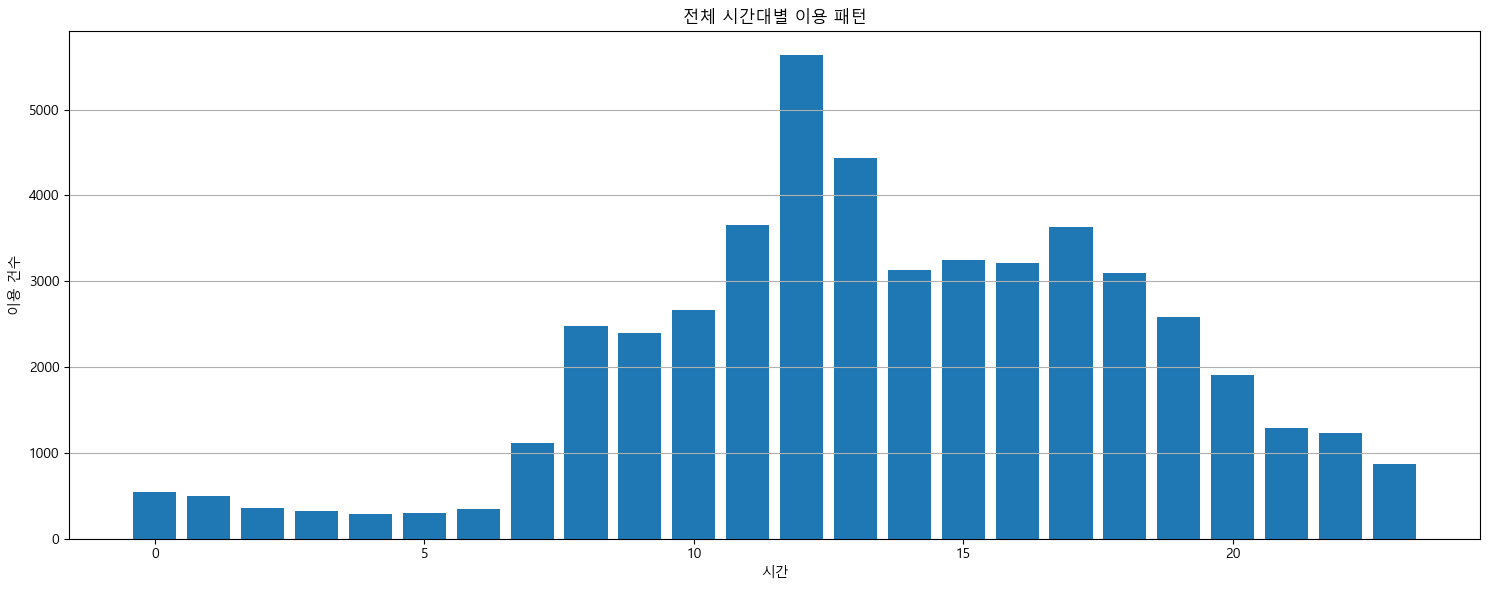

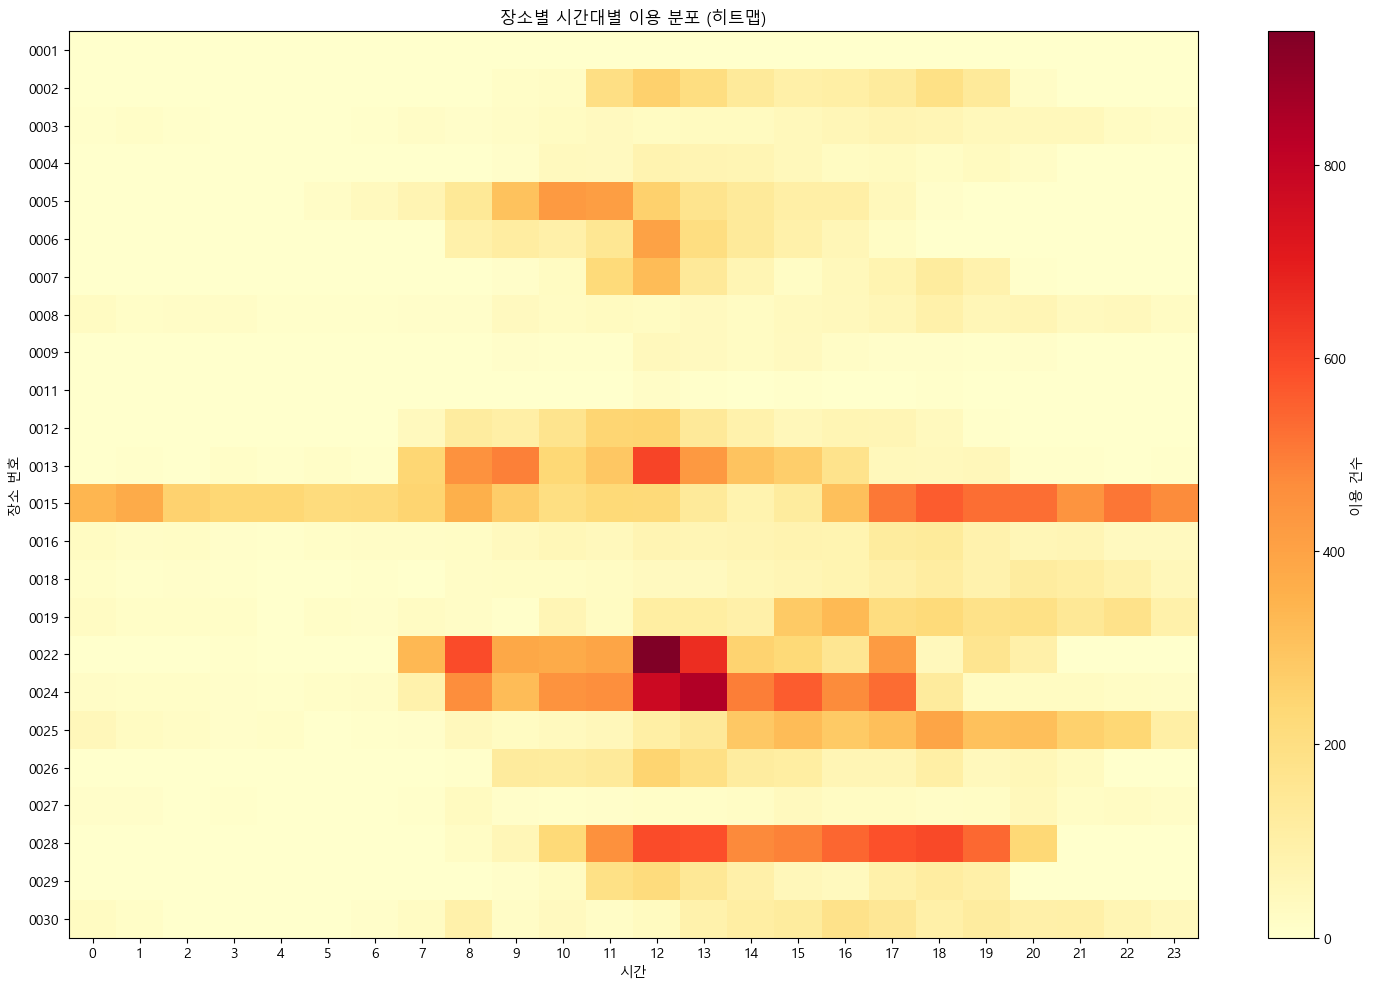


장소별 시간대 이용 비율 (%):
time_period  새벽(0-6시)  오전(6-12시)  오후(12-18시)  저녁(18-24시)
location                                                
1                0.00      57.14       42.86        0.00
2                0.00      32.71       57.21       10.08
3                4.67      21.10       46.38       27.86
4                0.00      34.40       54.70       10.90
5                2.51      72.35       25.04        0.09
6                0.00      62.85       37.15        0.00
7                0.00      51.37       40.85        7.78
8                8.83      18.80       40.31       32.05
9                0.00      31.58       59.81        8.61
11               0.00      47.37       42.11       10.53
12               0.29      67.28       31.91        0.52
13               1.04      62.96       34.12        1.88
15              21.15      21.10       23.58       34.17
16               7.09      21.61       47.26       24.04
18               2.85      11.59       42.14       43.42
19         

In [15]:
# 파일명에서 장소 번호와 시간 추출
def extract_location_time(filename):
    parts = filename.split('_')
    location = parts[0].zfill(4)  # 4자리 장소 번호
    location = int(location)      # 정수로 변환
    
    time_str = parts[1][:8]  # 시간 정보
    try:
        hour = int(time_str[4:6])  # 시간 추출
        if hour < 0 or hour > 23:  # 시간 유효성 검사
            print(f"Warning: Invalid hour ({hour}) in filename: {filename}")
            return location, None
        return location, hour
    except ValueError:
        print(f"Error extracting hour from filename: {filename}")
        return location, None

# 데이터 전처리
print("고유한 장소 번호:")
unique_locations = sorted(data['file_name'].apply(lambda x: int(x.split('_')[0])).unique())
print(unique_locations)

# 장소 번호와 시간 추출하여 새로운 열 추가
data['location'] = data['file_name'].apply(lambda x: extract_location_time(x)[0])
data['hour'] = data['file_name'].apply(lambda x: extract_location_time(x)[1])

# 유효한 시간 데이터만 필터링
data = data[data['hour'].notna()]
data['hour'] = data['hour'].astype(int)

# 장소별 시간대 분포 계산
location_hour_counts = pd.crosstab(data['location'], data['hour'])

print("\n전체 장소 수:", len(location_hour_counts))
print("\n처음 5개 장소의 시간대별 이용 건수:")
print(location_hour_counts.head())

# 장소별 가장 이용이 많은 시간대 찾기
peak_hours = location_hour_counts.idxmax(axis=1)
print("\n장소별 가장 이용이 많은 시간대:")
for loc in sorted(peak_hours.index):
    count = location_hour_counts.loc[loc, peak_hours[loc]]
    print(f"장소 {loc:04d}: {peak_hours[loc]:02d}시 (이용 건수: {count}건)")

# 전체 시간대별 이용 패턴
plt.figure(figsize=(15, 6))
total_hourly = location_hour_counts.sum()
plt.bar(total_hourly.index, total_hourly.values)
plt.title('전체 시간대별 이용 패턴')
plt.xlabel('시간')
plt.ylabel('이용 건수')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# 히트맵으로 시각화
plt.figure(figsize=(15, 10))
plt.imshow(location_hour_counts.values, aspect='auto', cmap='YlOrRd')
plt.colorbar(label='이용 건수')
plt.title('장소별 시간대별 이용 분포 (히트맵)')
plt.xlabel('시간')
plt.ylabel('장소 번호')
# x축 레이블 설정
plt.xticks(range(24), range(24))
# y축 레이블 설정 (모든 장소 번호를 4자리로 포맷팅)
plt.yticks(range(len(location_hour_counts.index)), 
           [f"{loc:04d}" for loc in location_hour_counts.index])
plt.tight_layout()
plt.show()

# 시간대 구분
data['time_period'] = pd.cut(data['hour'], 
                            bins=[0, 6, 12, 18, 24], 
                            labels=['새벽(0-6시)', '오전(6-12시)', '오후(12-18시)', '저녁(18-24시)'])

# 장소별 시간대 이용 비율
location_period = pd.crosstab(data['location'], data['time_period'], normalize='index') * 100
print("\n장소별 시간대 이용 비율 (%):")
print(location_period.round(2))

# 각 시간대별 주요 이용 장소 (상위 5개)
print("\n시간대별 주요 이용 장소 (상위 5개):")
for period in ['새벽(0-6시)', '오전(6-12시)', '오후(12-18시)', '저녁(18-24시)']:
    top_locations = location_period[period].sort_values(ascending=False).head()
    print(f"\n{period}:")
    for loc, ratio in top_locations.items():
        print(f"장소 {loc:04d}: {ratio:.2f}%")

### 장소 별 주요 이용 시간대(환경 분포)


장소별 환경 분포:
environment    1     2     3     4     5     6     7     8     9     10
location                                                               
1               0     0     0     0     0     7     0     0     0     0
2               0     0     0  1498     0     0     0     0     0     0
3               0     0     0   626     0     0     0     0     0     0
4             468     0     0     0     0     0     0     0     0     0
5               0     0     0     0     0  2228     0     0     0     0
6               0  1354     0     0     0     0     0     0     0     0
7               0     0     0     0     0     0     0     0     0  1131
8               0     0     0     0     0     0     0     0   728     0
9               0     0     0     0     0   209     0     0     0     0
11             38     0     0     0     0     0     0     0     0     0
12              0     0     0     0     0     0  1357     0     0     0
13              0     0  3667     0     0     0     

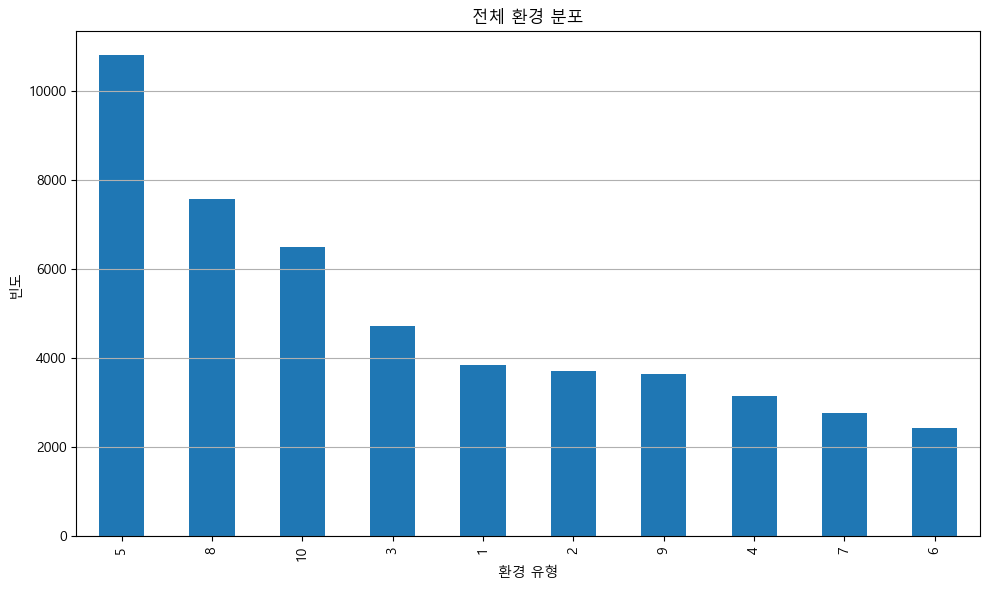

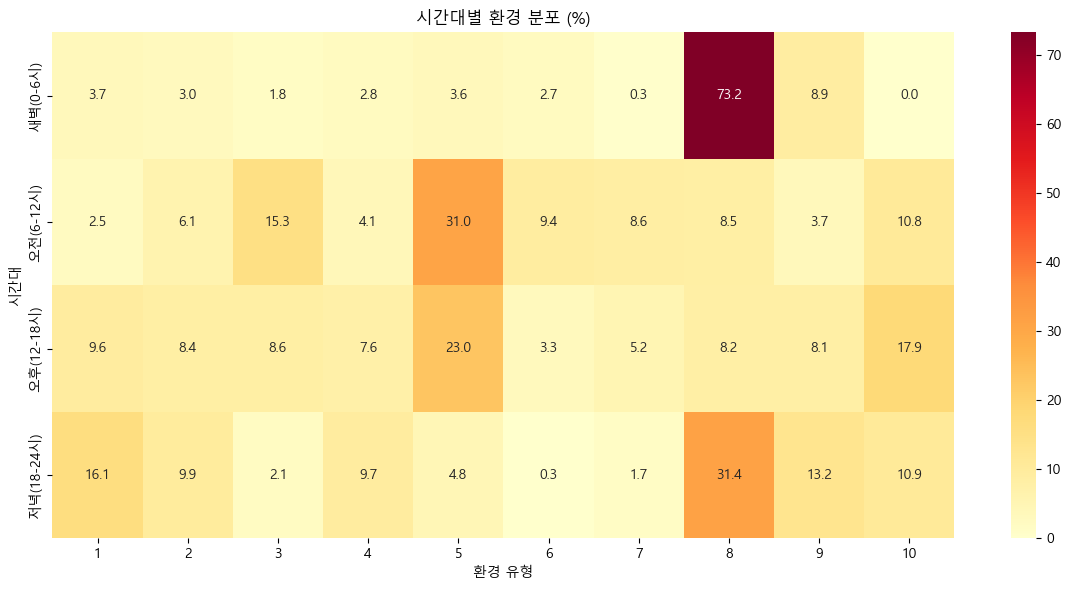

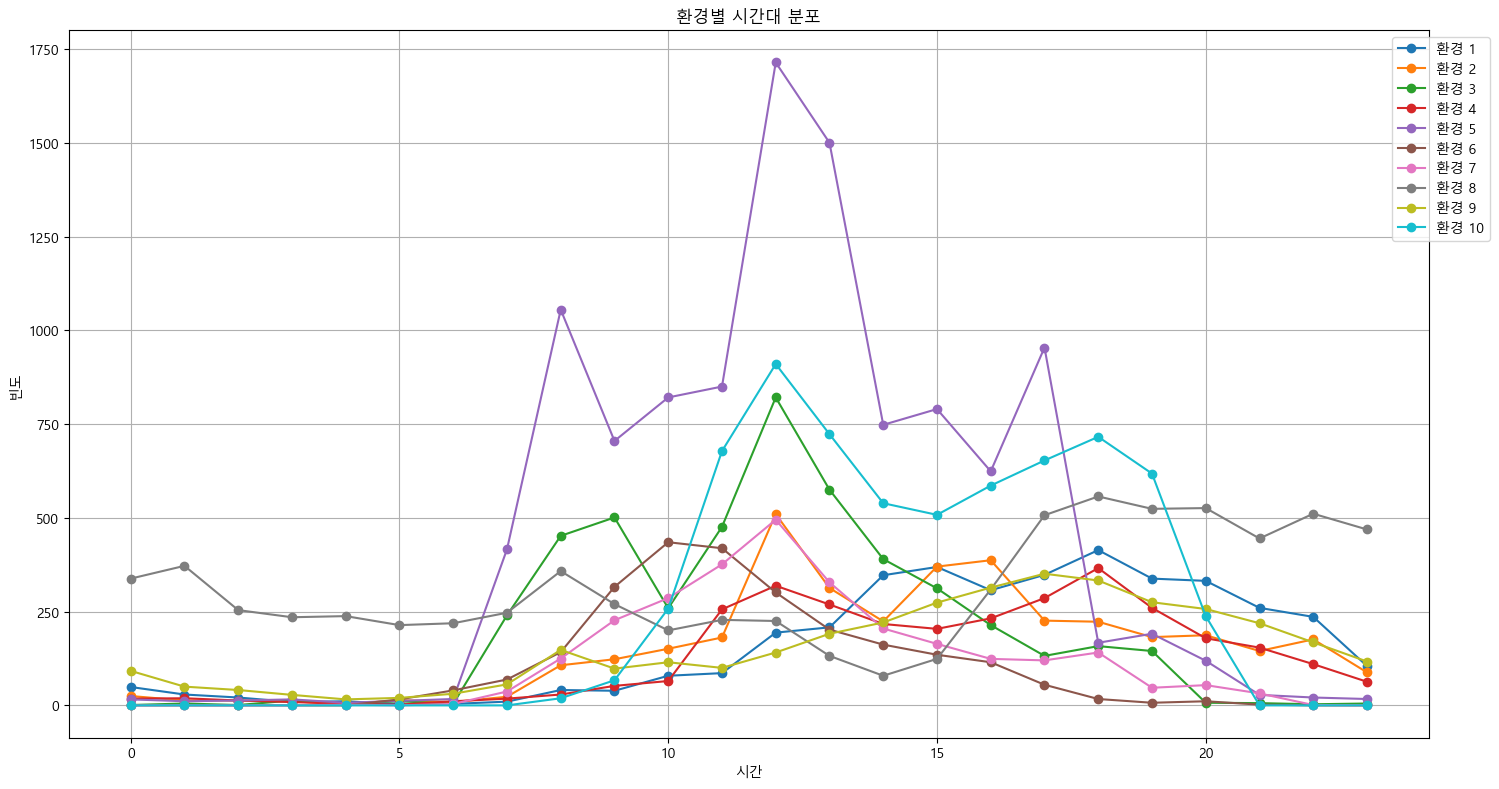


환경별 이용 통계:
            user_num              total_frames         
                mean   std  count         mean      std
environment                                            
1               1.16  0.48   3839      1121.81   836.71
2               1.39  0.84   3704      1874.79  2085.69
3               1.08  0.33   4735       928.09   902.19
4               1.32  0.62   3155      1951.08  2140.87
5               1.00  0.00  10812       542.62   519.85
6               1.04  0.25   2444      2076.69  1168.37
7               1.12  0.45   2768      1927.24  1597.27
8               1.00  0.00   7581       557.19   467.40
9               1.28  0.62   3656      1952.97  1789.35
10              1.07  0.29   6513       809.13   658.91

장소별 환경 다양성 (서로 다른 환경 수):
장소 0001: 1개 환경
장소 0002: 1개 환경
장소 0003: 1개 환경
장소 0004: 1개 환경
장소 0005: 1개 환경
장소 0006: 1개 환경
장소 0007: 1개 환경
장소 0008: 1개 환경
장소 0009: 1개 환경
장소 0011: 1개 환경
장소 0012: 1개 환경
장소 0013: 1개 환경
장소 0015: 1개 환경
장소 0016: 1개 환경
장소 0018: 1개 환경
장소 0019: 

In [16]:
# 파일명에서 장소 번호와 시간 추출
def extract_location_time(filename):
    parts = filename.split('_')
    location = int(parts[0])  # 장소 번호
    time_str = parts[1][:8]  # 시간 정보
    try:
        hour = int(time_str[4:6])  # 시간 추출
        if hour < 0 or hour > 23:  # 시간 유효성 검사
            print(f"Warning: Invalid hour ({hour}) in filename: {filename}")
            return location, None
        return location, hour
    except ValueError:
        print(f"Error extracting hour from filename: {filename}")
        return location, None

# 장소 번호와 시간 추출하여 새로운 열 추가
data['location'] = data['file_name'].apply(lambda x: extract_location_time(x)[0])
data['hour'] = data['file_name'].apply(lambda x: extract_location_time(x)[1])

# 시간대 구분
data['time_period'] = pd.cut(data['hour'], 
                            bins=[0, 6, 12, 18, 24], 
                            labels=['새벽(0-6시)', '오전(6-12시)', '오후(12-18시)', '저녁(18-24시)'])

# 1. 장소별 환경 분포
location_env = pd.crosstab(data['location'], data['environment'])
print("\n장소별 환경 분포:")
print(location_env)

# 2. 장소별 주요 환경 (가장 많이 나타나는 환경)
main_env = location_env.idxmax(axis=1)
print("\n장소별 주요 환경:")
for loc in sorted(main_env.index):
    count = location_env.loc[loc, main_env[loc]]
    total = location_env.loc[loc].sum()
    percentage = (count / total) * 100
    print(f"장소 {loc:04d}: 환경 {main_env[loc]} ({percentage:.1f}%)")

# 3. 시간대별 환경 분포
time_env = pd.crosstab(data['time_period'], data['environment'], normalize='index') * 100
print("\n시간대별 환경 분포 (%):")
print(time_env.round(2))

# 4. 시각화

# 4.1 전체 환경 분포
plt.figure(figsize=(10, 6))
data['environment'].value_counts().plot(kind='bar')
plt.title('전체 환경 분포')
plt.xlabel('환경 유형')
plt.ylabel('빈도')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# 4.2 시간대별 환경 분포 히트맵
plt.figure(figsize=(12, 6))
sns.heatmap(time_env, annot=True, fmt='.1f', cmap='YlOrRd')
plt.title('시간대별 환경 분포 (%)')
plt.xlabel('환경 유형')
plt.ylabel('시간대')
plt.tight_layout()
plt.show()

# 4.3 각 환경별 시간대 분포
env_time_counts = pd.crosstab(data['environment'], data['hour'])
plt.figure(figsize=(15, 8))
for env in sorted(data['environment'].unique()):
    plt.plot(env_time_counts.columns, 
             env_time_counts.loc[env], 
             label=f'환경 {env}',
             marker='o')
plt.title('환경별 시간대 분포')
plt.xlabel('시간')
plt.ylabel('빈도')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

# 5. 상세 통계
print("\n환경별 이용 통계:")
env_stats = data.groupby('environment').agg({
    'user_num': ['mean', 'std', 'count'],
    'total_frames': ['mean', 'std']
}).round(2)
print(env_stats)

# 6. 장소별 환경 다양성
env_diversity = location_env.apply(lambda x: (x > 0).sum(), axis=1)
print("\n장소별 환경 다양성 (서로 다른 환경 수):")
for loc in sorted(env_diversity.index):
    print(f"장소 {loc:04d}: {env_diversity[loc]}개 환경")

# 7. 시간대별 주요 환경 변화
for period in data['time_period'].unique():
    period_data = data[data['time_period'] == period]
    env_counts = period_data['environment'].value_counts()
    top_envs = env_counts.head(3)
    print(f"\n{period} 주요 환경:")
    for env, count in top_envs.items():
        percentage = (count / len(period_data)) * 100
        print(f"환경 {env}: {percentage:.1f}% ({count}건)")

### 성별 주요 이용 시간대

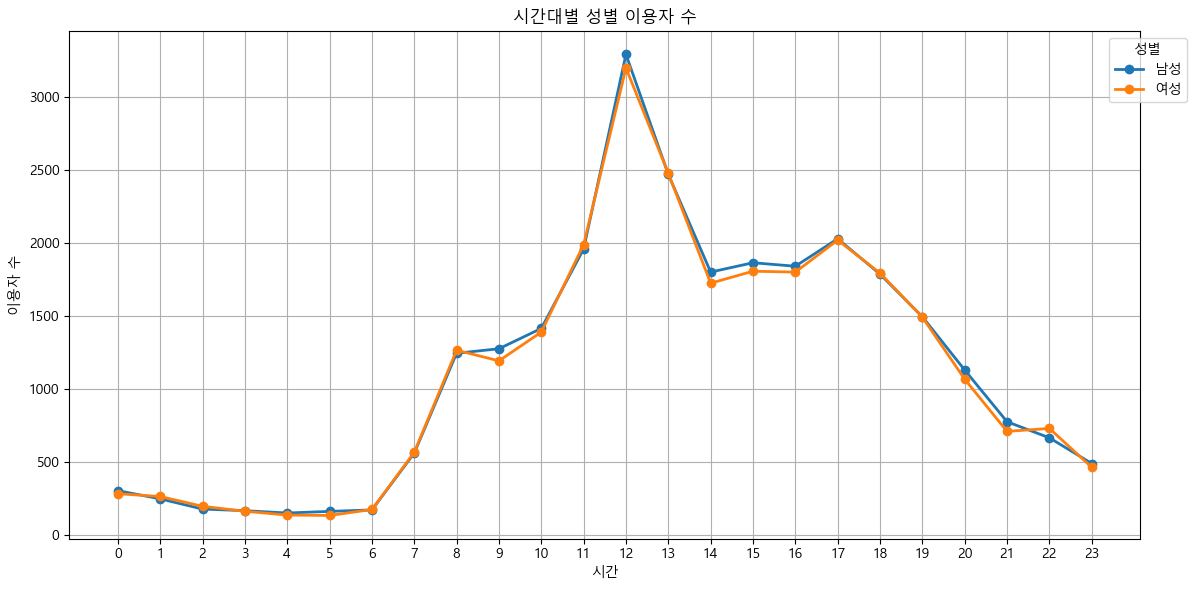


시간대별 성별 비율 (%):
         남성     여성
hour              
0     51.79  48.21
1     48.43  51.57
2     47.45  52.55
3     50.61  49.39
4     52.45  47.55
5     54.76  45.24
6     49.57  50.43
7     49.78  50.22
8     49.58  50.42
9     51.68  48.32
10    50.45  49.55
11    49.62  50.38
12    50.72  49.28
13    49.93  50.07
14    51.08  48.92
15    50.79  49.21
16    50.55  49.45
17    50.11  49.89
18    49.90  50.10
19    50.05  49.95
20    51.44  48.56
21    52.22  47.78
22    47.70  52.30
23    51.37  48.63


In [19]:
# 파일명에서 시간 추출
def extract_hour(filename):
    try:
        time_str = filename.split('_')[1]
        time_str = time_str.split('.')[0]
        hour = int(time_str[4:6])

        if hour < 0 or hour > 23:
            print(f"Warning: Invalid hour ({hour}) in filename: {filename}")
            return None
        return hour
    except (IndexError, ValueError) as e:
        print(f"Error processing filename: {filename}")
        print(f"Error details: {str(e)}")
        return None

# 시간 정보 추출
data['hour'] = data['file_name'].apply(extract_hour)

# 모든 사용자 성별 컬럼 찾기
gender_columns = [col for col in data.columns if 'user_' in col and 'gender' in col]

# 시간대별 성별 이용자 수 계산
# 여러 gender 컬럼을 하나로 합쳐 처리
gender_data = pd.concat([data[['hour', col]].rename(columns={col: 'gender'}) for col in gender_columns], axis=0)

# 교차표 생성
gender_hour = pd.crosstab(gender_data['hour'], gender_data['gender'])
gender_hour.columns = ['남성', '여성']  # 컬럼 이름 변경 (필요 시 사용자 데이터에 맞게 수정)

# 시각화: 시간대별 성별 이용자 수 (꺾은선 그래프)
plt.figure(figsize=(12, 6))
plt.plot(gender_hour.index, gender_hour['남성'], marker='o', label='남성', linewidth=2)
plt.plot(gender_hour.index, gender_hour['여성'], marker='o', label='여성', linewidth=2)

plt.title('시간대별 성별 이용자 수')
plt.xlabel('시간')
plt.ylabel('이용자 수')
plt.legend(title='성별', bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.xticks(range(24))  # 0-23시까지 표시
plt.tight_layout()
plt.show()

# 시간대별 성별 비율 출력
gender_hour_ratio = gender_hour.div(gender_hour.sum(axis=1), axis=0) * 100
print("\n시간대별 성별 비율 (%):")
print(gender_hour_ratio.round(2))


### 연령대별 주요 이용 시간대

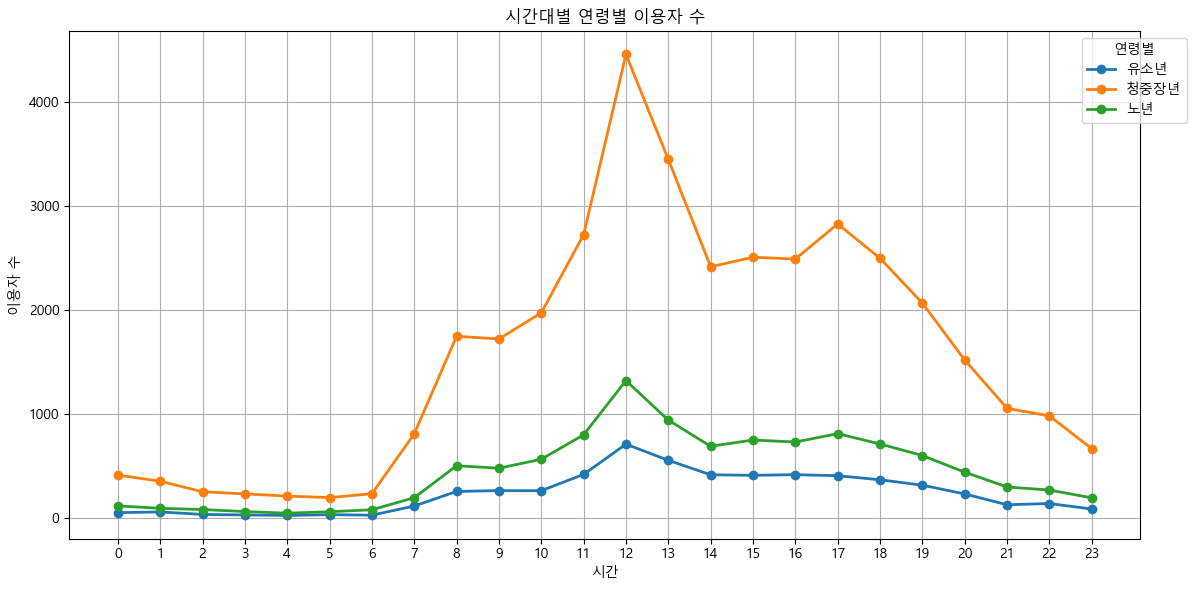


시간대별 연령별 비율 (%):
        유소년   청중장년     노년
hour                     
0      9.06  70.77  20.17
1     11.76  69.61  18.63
2      9.65  68.10  22.25
3      9.45  71.04  19.51
4      9.09  74.13  16.78
5     11.56  67.35  21.09
6      8.41  68.12  23.48
7     10.40  72.09  17.51
8     10.24  69.67  20.09
9     10.74  69.80  19.46
10     9.42  70.39  20.19
11    10.67  69.03  20.30
12    10.96  68.67  20.37
13    11.24  69.71  19.05
14    11.83  68.56  19.61
15    11.23  68.31  20.46
16    11.48  68.41  20.11
17    10.08  69.85  20.06
18    10.31  69.77  19.92
19    10.62  69.21  20.17
20    10.62  69.25  20.14
21     8.69  71.09  20.22
22    10.11  70.52  19.37
23     9.24  70.17  20.59


In [20]:
# 파일명에서 시간 추출
def extract_hour(filename):
    try:
        time_str = filename.split('_')[1]
        time_str = time_str.split('.')[0]
        hour = int(time_str[4:6])

        if hour < 0 or hour > 23:
            print(f"Warning: Invalid hour ({hour}) in filename: {filename}")
            return None
        return hour
    except (IndexError, ValueError) as e:
        print(f"Error processing filename: {filename}")
        print(f"Error details: {str(e)}")
        return None

# 시간 정보 추출
data['hour'] = data['file_name'].apply(extract_hour)

# 모든 사용자 연령 별 컬럼 찾기
age_columns = [col for col in data.columns if 'user_' in col and 'age' in col]

# 시간대별 연령 별 이용자 수 계산
# 여러 age 컬럼을 하나로 합쳐 처리
age_data = pd.concat([data[['hour', col]].rename(columns={col: 'age'}) for col in age_columns], axis=0)

# 교차표 생성
age_hour = pd.crosstab(age_data['hour'], age_data['age'])
age_hour.columns = ['유소년', '청중장년', '노년']  

# 시각화: 시간대별 연령 별 이용자 수 (꺾은선 그래프)
plt.figure(figsize=(12, 6))
plt.plot(age_hour.index, age_hour['유소년'], marker='o', label='유소년', linewidth=2)
plt.plot(age_hour.index, age_hour['청중장년'], marker='o', label='청중장년', linewidth=2)
plt.plot(age_hour.index, age_hour['노년'], marker='o', label='노년', linewidth=2)

plt.title('시간대별 연령별 이용자 수')
plt.xlabel('시간')
plt.ylabel('이용자 수')
plt.legend(title='연령별', bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.xticks(range(24))  # 0-23시까지 표시
plt.tight_layout()
plt.show()

# 시간대별 연령 별 비율 출력
age_hour_ratio = age_hour.div(age_hour.sum(axis=1), axis=0) * 100
print("\n시간대별 연령별 비율 (%):")
print(age_hour_ratio.round(2))


### 장애 유무 별 주요 이용 시간대

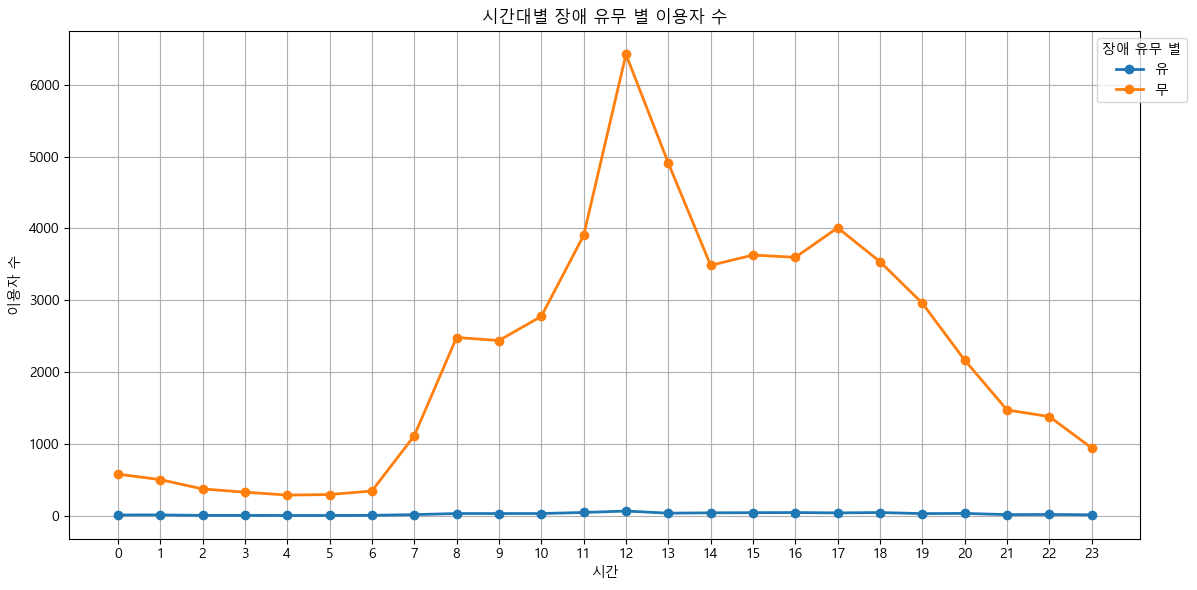


시간대별 장애 유무 별 비율 (%):
         유      무
hour             
0     1.37  98.63
1     1.76  98.24
2     0.54  99.46
3     0.61  99.39
4     0.35  99.65
5     0.34  99.66
6     0.87  99.13
7     1.16  98.84
8     1.12  98.88
9     1.13  98.87
10    1.00  99.00
11    1.09  98.91
12    0.97  99.03
13    0.67  99.33
14    1.08  98.92
15    1.09  98.91
16    1.15  98.85
17    0.91  99.09
18    1.17  98.83
19    0.90  99.10
20    1.37  98.63
21    0.88  99.12
22    1.08  98.92
23    1.16  98.84


In [22]:
# 파일명에서 시간 추출
def extract_hour(filename):
    try:
        time_str = filename.split('_')[1]
        time_str = time_str.split('.')[0]
        hour = int(time_str[4:6])

        if hour < 0 or hour > 23:
            print(f"Warning: Invalid hour ({hour}) in filename: {filename}")
            return None
        return hour
    except (IndexError, ValueError) as e:
        print(f"Error processing filename: {filename}")
        print(f"Error details: {str(e)}")
        return None

# 시간 정보 추출
data['hour'] = data['file_name'].apply(extract_hour)

# 모든 사용자 장애 유무 별 컬럼 찾기
disability_columns = [col for col in data.columns if 'user_' in col and 'disability' in col]

# 시간대별 장애 유무 별 이용자 수 계산
# 여러 disability 컬럼을 하나로 합쳐 처리
disability_data = pd.concat([data[['hour', col]].rename(columns={col: 'disability'}) for col in disability_columns], axis=0)

# 교차표 생성
disability_hour = pd.crosstab(disability_data['hour'], disability_data['disability'])
disability_hour.columns = ['유', '무']  

# 시각화: 시간대별 장애 유무 별 이용자 수 (꺾은선 그래프)
plt.figure(figsize=(12, 6))
plt.plot(disability_hour.index, disability_hour['유'], marker='o', label='유', linewidth=2)
plt.plot(disability_hour.index, disability_hour['무'], marker='o', label='무', linewidth=2)

plt.title('시간대별 장애 유무 별 이용자 수')
plt.xlabel('시간')
plt.ylabel('이용자 수')
plt.legend(title='장애 유무 별', bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.xticks(range(24))  # 0-23시까지 표시
plt.tight_layout()
plt.show()

# 시간대별 장애 유무 별 비율 출력
disability_hour_ratio = disability_hour.div(disability_hour.sum(axis=1), axis=0) * 100
print("\n시간대별 장애 유무 별 비율 (%):")
print(disability_hour_ratio.round(2))


### 성별 주요 이용 장소(환경분포)


성별별 주요 이용 장소:

1.0의 주요 이용 장소:
   environment  count
4            5   5459
7            8   3833
9           10   3485
1            2   2548
2            3   2548
8            9   2293
0            1   2208
3            4   2112
6            7   1542
5            6   1428

2.0의 주요 이용 장소:
    environment  count
14            5   5353
17            8   3748
19           10   3419
11            2   2600
12            3   2553
18            9   2402
10            1   2228
13            4   2035
16            7   1561
15            6   1120


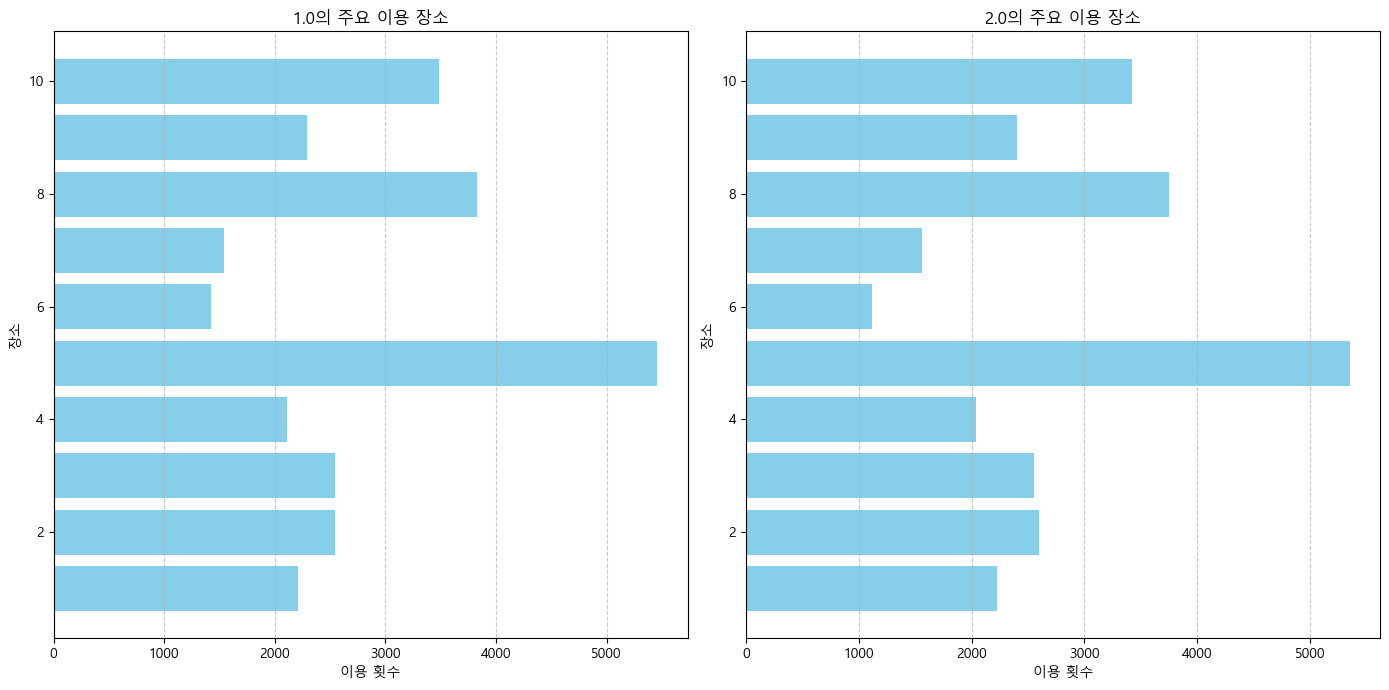

In [23]:
# 성별 주요 이용 장소 분석

# 필요한 컬럼: hour, environment, 그리고 모든 성별 관련 컬럼
required_columns = ['hour', 'environment'] + gender_columns

# 필요한 데이터만 필터링
filtered_data = data[required_columns]

# 데이터 변환: 성별 컬럼별로 분리 후 결합
gender_env_data = pd.concat(
    [filtered_data[['hour', 'environment', col]].rename(columns={col: 'gender'}) for col in gender_columns],
    axis=0
)

# 성별별 주요 이용 장소 계산
gender_env_count = gender_env_data.groupby(['gender', 'environment']).size().reset_index(name='count')

# 성별별 주요 이용 장소 정렬
gender_env_sorted = gender_env_count.sort_values(['gender', 'count'], ascending=[True, False])

# 성별별로 주요 이용 장소 출력
print("\n성별별 주요 이용 장소:")
for gender in gender_env_sorted['gender'].unique():
    print(f"\n{gender}의 주요 이용 장소:")
    print(gender_env_sorted[gender_env_sorted['gender'] == gender][['environment', 'count']])

# 시각화: 성별별 주요 이용 장소 (막대 그래프)
plt.figure(figsize=(14, 7))
for idx, gender in enumerate(gender_env_sorted['gender'].unique(), 1):
    plt.subplot(1, len(gender_env_sorted['gender'].unique()), idx)
    gender_data = gender_env_sorted[gender_env_sorted['gender'] == gender]
    plt.barh(gender_data['environment'], gender_data['count'], color='skyblue')
    plt.title(f"{gender}의 주요 이용 장소")
    plt.xlabel("이용 횟수")
    plt.ylabel("장소")
    plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


### 연령대별 주요 이용 장소(환경분포)


연령대별 주요 이용 장소:

1.0의 주요 이용 장소:
   environment  count
4            5   1068
7            8    770
9           10    762
5            6    589
2            3    504
1            2    491
8            9    464
0            1    427
3            4    424
6            7    293

2.0의 주요 이용 장소:
    environment  count
14            5   7631
17            8   5252
19           10   4766
11            2   3618
12            3   3568
18            9   3290
10            1   3127
13            4   2870
16            7   2176
15            6   1513

3.0의 주요 이용 장소:
    environment  count
24            5   2113
27            8   1559
29           10   1376
21            2   1039
22            3   1029
28            9    941
20            1    882
23            4    853
26            7    634
25            6    446


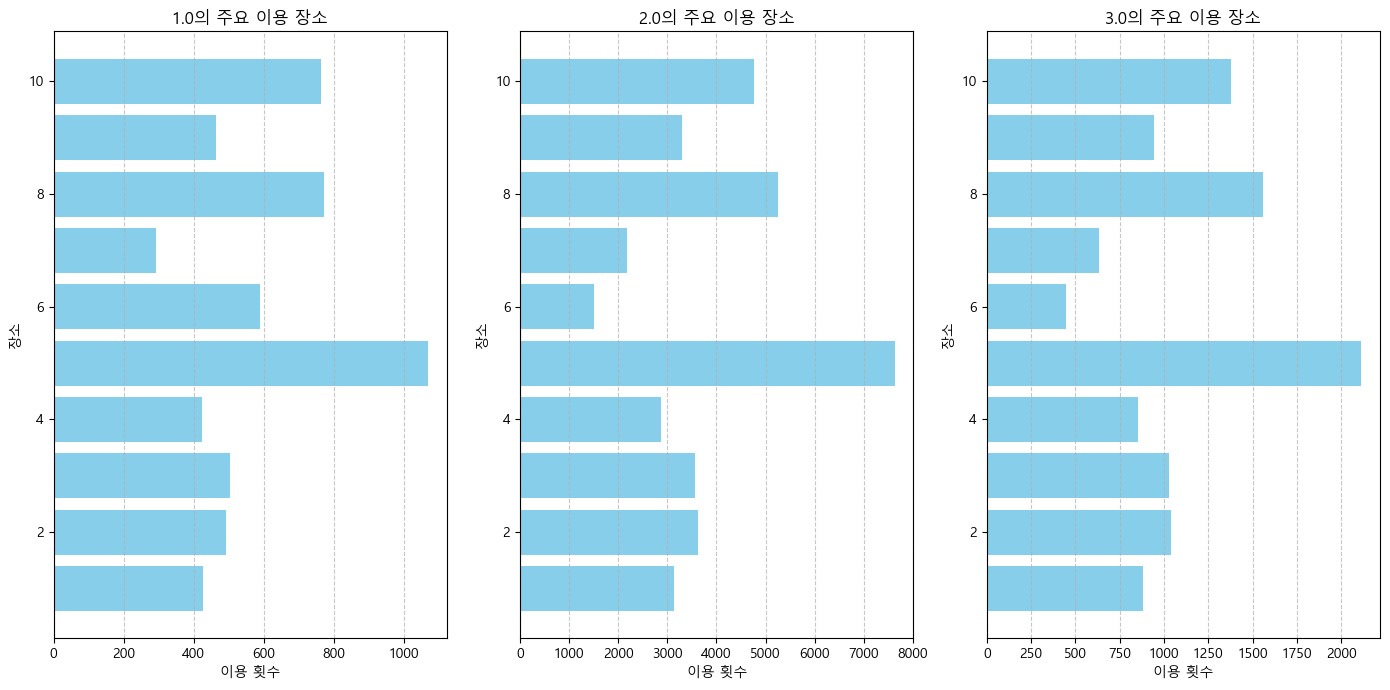

In [24]:
# 연령대별 주요 이용 장소 분석

# 필요한 컬럼: hour, environment, 그리고 모든 연령대별 관련 컬럼
required_columns2 = ['hour', 'environment'] + age_columns

# 필요한 데이터만 필터링
filtered_data2 = data[required_columns2]

# 데이터 변환: 연령대별 컬럼별로 분리 후 결합
age_env_data = pd.concat(
    [filtered_data2[['hour', 'environment', col]].rename(columns={col: 'age'}) for col in age_columns],
    axis=0
)

# 연령대별 주요 이용 장소 계산
age_env_count = age_env_data.groupby(['age', 'environment']).size().reset_index(name='count')

# 연령대별 주요 이용 장소 정렬
age_env_sorted = age_env_count.sort_values(['age', 'count'], ascending=[True, False])

# 연령대별로 주요 이용 장소 출력
print("\n연령대별 주요 이용 장소:")
for age in age_env_sorted['age'].unique():
    print(f"\n{age}의 주요 이용 장소:")
    print(age_env_sorted[age_env_sorted['age'] == age][['environment', 'count']])

# 시각화: 연령대별 주요 이용 장소 (막대 그래프)
plt.figure(figsize=(14, 7))
for idx, age in enumerate(age_env_sorted['age'].unique(), 1):
    plt.subplot(1, len(age_env_sorted['age'].unique()), idx)
    age_data = age_env_sorted[age_env_sorted['age'] == age]
    plt.barh(age_data['environment'], age_data['count'], color='skyblue')
    plt.title(f"{age}의 주요 이용 장소")
    plt.xlabel("이용 횟수")
    plt.ylabel("장소")
    plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### 장애유무별 주요 이용 장소(환경분포)


장애 유무 별 주요 이용 장소:

1.0의 주요 이용 장소:
   environment  count
4            5    110
1            2     72
7            8     71
9           10     68
0            1     57
8            9     45
6            7     43
2            3     37
3            4     37
5            6     17

2.0의 주요 이용 장소:
    environment  count
14            5  10702
17            8   7510
19           10   6836
11            2   5076
12            3   5064
18            9   4650
10            1   4379
13            4   4110
16            7   3060
15            6   2531


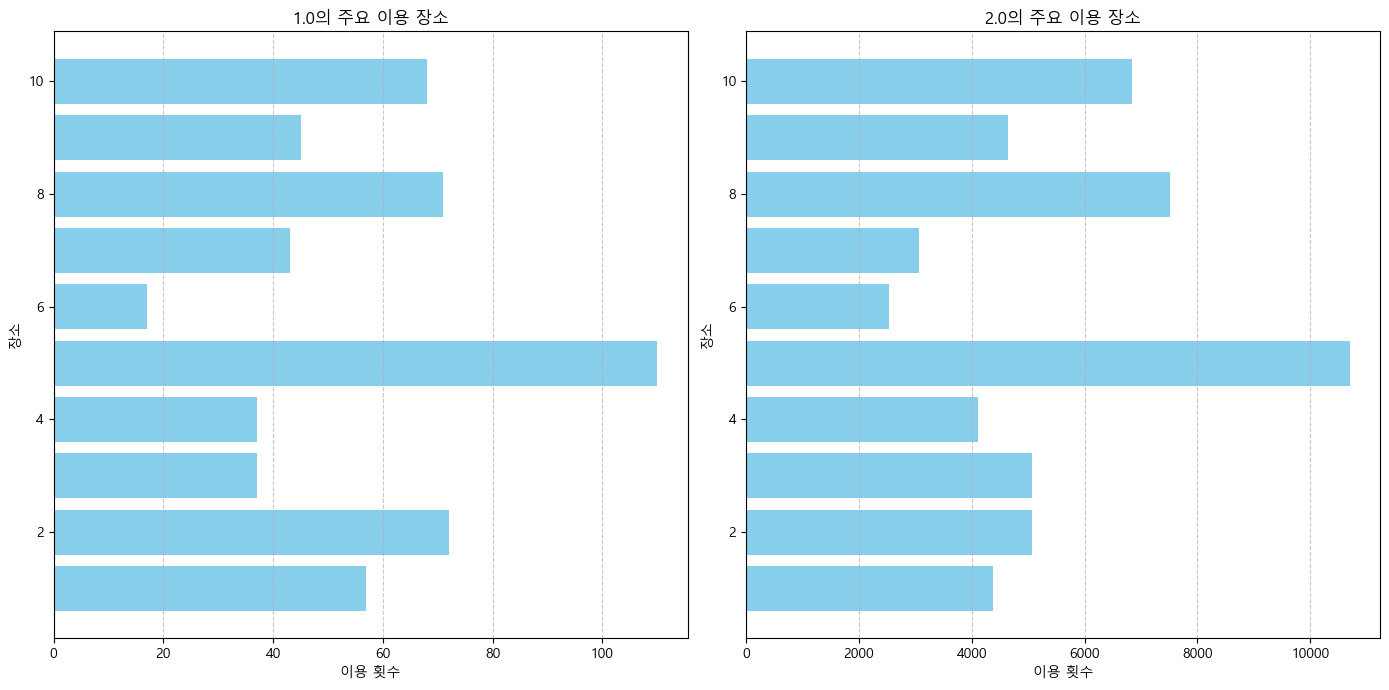

In [25]:
# 장애 유무 별 주요 이용 장소 분석

# 필요한 컬럼: hour, environment, 그리고 모든 장애 유무 별 관련 컬럼
required_columns3 = ['hour', 'environment'] + disability_columns

# 필요한 데이터만 필터링
filtered_data3 = data[required_columns3]

# 데이터 변환: 장애 유무 별 컬럼별로 분리 후 결합
disability_env_data = pd.concat(
    [filtered_data3[['hour', 'environment', col]].rename(columns={col: 'disability'}) for col in disability_columns],
    axis=0
)

# 장애 유무 별 주요 이용 장소 계산
disability_env_count = disability_env_data.groupby(['disability', 'environment']).size().reset_index(name='count')

# 장애 유무 별 주요 이용 장소 정렬
disability_env_sorted = disability_env_count.sort_values(['disability', 'count'], ascending=[True, False])

# 장애 유무 별로 주요 이용 장소 출력
print("\n장애 유무 별 주요 이용 장소:")
for disability in disability_env_sorted['disability'].unique():
    print(f"\n{disability}의 주요 이용 장소:")
    print(disability_env_sorted[disability_env_sorted['disability'] == disability][['environment', 'count']])

# 시각화: 장애 유무 별 주요 이용 장소 (막대 그래프)
plt.figure(figsize=(14, 7))
for idx, disability in enumerate(disability_env_sorted['disability'].unique(), 1):
    plt.subplot(1, len(disability_env_sorted['disability'].unique()), idx)
    disability_data = disability_env_sorted[disability_env_sorted['disability'] == disability]
    plt.barh(disability_data['environment'], disability_data['count'], color='skyblue')
    plt.title(f"{disability}의 주요 이용 장소")
    plt.xlabel("이용 횟수")
    plt.ylabel("장소")
    plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()